In [ ]:
# # 1. 한글 폰트 설치
# !apt-get -qq install -y fonts-nanum > /dev/null

# # 2. 런타임에 폰트 등록
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm
# import matplotlib as mpl

# # 폰트 이름 확인
# font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font_name = fm.FontProperties(fname=font_path).get_name()

# # matplotlib에 기본 폰트로 설정
# plt.rc('font', family=font_name)
# mpl.rcParams['axes.unicode_minus'] = False

# # 확인
# print(f"설정된 폰트: {font_name}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [ ]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [ ]:
nation_code_map = {
    '중국': 1, '일본': 2, '대만': 3, '미국': 4, '홍콩': 5,
    '태국': 6, '베트남': 7, '말레이시아': 8, '필리핀': 9, '싱가포르': 10,
    '러시아': 11, '중동': 12, '인도네시아': 13, '캐나다': 14, '호주': 15,
    '영국': 16, '몽골': 17, '독일': 18, '프랑스': 19, '인도': 20
}

# cluster1에 대한 데이터셋 만들기

In [ ]:
df_2024=pd.read_csv("/content/drive/MyDrive/관광공모전/원본데이터/sav/2024_sav_csv.csv")
df_2024.head()

/tmp/ipython-input-5-3815337575.py:1: DtypeWarning: Columns (28,29,118,246) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2024=pd.read_csv("/content/drive/MyDrive/관광공모전/원본데이터/sav/2024_sav_csv.csv")


,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,D_SEX,D_AGE,D_MOK,D_NUM,D_GUB,weight1,weight2,weight3,weight4,weight
0,57,5,4회 이상,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식","한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서",NaN,NaN,NaN,...,여 성,50 대,여 가/위 락/ 휴 식,4 회 이 상,개 별 여 행,198.017146,NaN,NaN,NaN,198.017146
1,58,4,4회 이상,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식","한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서","한국의 가성비 높은 여행 상품(패키지, 항공권 등)을 접하고 나서",과거 방문 경험이 좋아서,일본,...,여 성,40 대,여 가/위 락/ 휴 식,4 회 이 상,개 별 여 행,784.278401,NaN,NaN,NaN,784.278401
2,59,3,3회,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식","한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서",과거 방문 경험이 좋아서,"한국 전통문화(한복, 한식 등 고유문화)를 접하고 나서",일본,...,여 성,30 대,여 가/위 락/ 휴 식,3 회,개 별 여 행,607.021269,NaN,NaN,NaN,607.021269
3,60,1,1회,NaN,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식","한국 전통문화(한복, 한식 등 고유문화)를 접하고 나서","한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서","한국에서 행사(가족행사, 스포츠 행사 등)가 있어서",NaN,...,남 성,20 대,여 가/위 락/ 휴 식,1 회,개 별 여 행,1049.500143,NaN,NaN,NaN,1049.500143
4,61,5,4회 이상,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식",과거 방문 경험이 좋아서,한국의 다양한 관광지 관련 정보를 접하고 나서,"한국의 가성비 높은 여행 상품(패키지, 항공권 등)을 접하고 나서",홍콩,...,여 성,20 대,여 가/위 락/ 휴 식,4 회 이 상,개 별 여 행,876.796936,NaN,NaN,NaN,876.796936


In [ ]:
df_2024['D_NAT'] = df_2024['D_NAT'].str.replace(' ', '', regex=False)

In [ ]:
df_2024['D_NAT']

,D_NAT
0,인도네시아
1,대만
2,대만
3,중국
4,대만
...,...
16211,중국
16212,중국
16213,중국
16214,중국


In [ ]:
# 국가별 클러스터링 결과 데이터셋 불러오기
df_cluster = pd.read_csv("/content/drive/MyDrive/관광공모전/국가별_PCA_입력데이터_with_cluster.csv", index_col=0)

In [ ]:
df_cluster.head()

,RVIT_1회,RVIT_2회,RVIT_3회,RVIT_4회 이상,"TYP_Air-tel package(semi-package) : 여행사를 통해 항공 및 숙박 등 일부 패키지만 구입하고, 가이드 없이 관광","TYP_개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","TYP_단체여행(package tour) : 여행사에서 기획한 여행상품을 구매, 인센티브 관광 등 가이드가 동반한 여행형태","Q1_교육(어학 프로그램, 연수 등)",Q1_기타,Q1_사업 또는 전문 활동,...,MQ10_2b05,MQ10_2b06,MQ10_2b07,MQ10_2b08,MQ10_2b09,MQ10_2b10,MQ10_2b11,MQ10_2b12,MQ10_2b13,cluster
D_NAT,,,,,,,,,,,,,,,,,,,,,
기타,0.673806,0.171334,0.064250,0.090610,0.004942,0.981878,0.013180,0.049423,0.036244,0.240527,...,2.373970,3.667216,1.321252,1.288303,0.439868,5.034596,2.650741,1.874794,3.629325,1
대만,0.438462,0.250000,0.118462,0.193077,0.026154,0.571538,0.402308,0.012308,0.002308,0.084615,...,2.196923,2.181538,6.674615,2.033077,2.034615,1.416154,2.716923,0.703846,1.200000,0
독일,0.659574,0.160757,0.078014,0.101655,0.002364,0.976359,0.021277,0.049645,0.011820,0.271868,...,1.713948,4.713948,0.617021,1.560284,0.614657,8.356974,2.300236,1.553191,2.730496,1
러시아,0.531765,0.185882,0.120000,0.162353,0.000000,0.983529,0.016471,0.042353,0.032941,0.303529,...,4.752941,2.552941,2.976471,2.023529,1.847059,2.800000,1.482353,3.105882,2.847059,2
말레이시아,0.523102,0.222772,0.099010,0.155116,0.004950,0.727723,0.267327,0.019802,0.006601,0.176568,...,4.826733,4.478548,5.668317,0.948845,0.958746,3.613861,2.447195,1.089109,2.508251,0


In [ ]:
# 인덱스를 국가명으로 간주하여 컬럼으로 변환
df_cluster = df_cluster.reset_index().rename(columns={'index': '국가명'})

In [ ]:
df_cluster

,D_NAT,RVIT_1회,RVIT_2회,RVIT_3회,RVIT_4회 이상,"TYP_Air-tel package(semi-package) : 여행사를 통해 항공 및 숙박 등 일부 패키지만 구입하고, 가이드 없이 관광","TYP_개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","TYP_단체여행(package tour) : 여행사에서 기획한 여행상품을 구매, 인센티브 관광 등 가이드가 동반한 여행형태","Q1_교육(어학 프로그램, 연수 등)",Q1_기타,...,MQ10_2b05,MQ10_2b06,MQ10_2b07,MQ10_2b08,MQ10_2b09,MQ10_2b10,MQ10_2b11,MQ10_2b12,MQ10_2b13,cluster
0,기타,0.673806,0.171334,0.064250,0.090610,0.004942,0.981878,0.013180,0.049423,0.036244,...,2.373970,3.667216,1.321252,1.288303,0.439868,5.034596,2.650741,1.874794,3.629325,1
1,대만,0.438462,0.250000,0.118462,0.193077,0.026154,0.571538,0.402308,0.012308,0.002308,...,2.196923,2.181538,6.674615,2.033077,2.034615,1.416154,2.716923,0.703846,1.200000,0
2,독일,0.659574,0.160757,0.078014,0.101655,0.002364,0.976359,0.021277,0.049645,0.011820,...,1.713948,4.713948,0.617021,1.560284,0.614657,8.356974,2.300236,1.553191,2.730496,1
3,러시아,0.531765,0.185882,0.120000,0.162353,0.000000,0.983529,0.016471,0.042353,0.032941,...,4.752941,2.552941,2.976471,2.023529,1.847059,2.800000,1.482353,3.105882,2.847059,2
4,말레이시아,0.523102,0.222772,0.099010,0.155116,0.004950,0.727723,0.267327,0.019802,0.006601,...,4.826733,4.478548,5.668317,0.948845,0.958746,3.613861,2.447195,1.089109,2.508251,0
5,몽골,0.348449,0.202864,0.095465,0.353222,0.002387,0.978520,0.019093,0.085919,0.035800,...,5.625298,4.128878,3.937947,3.155131,1.446301,0.482100,0.202864,6.133652,2.505967,2
6,미국,0.588087,0.172819,0.088087,0.151007,0.005872,0.960570,0.033557,0.034396,0.019295,...,2.481544,4.835570,2.103188,1.687919,0.574664,6.055369,1.861577,0.989933,2.187081,1
7,베트남,0.654096,0.184655,0.078023,0.083225,0.015605,0.596879,0.387516,0.075423,0.006502,...,3.016905,2.074122,18.511053,1.404421,0.994798,1.196359,1.215865,2.366710,0.494148,0
8,싱가포르,0.381368,0.228530,0.155750,0.234352,0.008734,0.927220,0.064047,0.010189,0.004367,...,5.240175,4.529840,3.898108,1.302766,0.727802,1.950509,2.205240,0.553130,1.084425,0
9,영국,0.620525,0.169451,0.083532,0.126492,0.009547,0.983294,0.007160,0.026253,0.019093,...,2.923628,3.520286,1.408115,1.224344,0.298329,6.558473,3.816229,1.422434,1.341289,1


In [ ]:
# 병합에 필요한 두 컬럼을 DataFrame 형태로 지정
df_2024_clustered = df_2024.merge(
    df_cluster[['D_NAT', 'cluster']],
    on='D_NAT',
    how='left'
)

In [ ]:
df_2024_clustered.head()

,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,D_AGE,D_MOK,D_NUM,D_GUB,weight1,weight2,weight3,weight4,weight,cluster
0,57,5,4회 이상,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식","한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서",NaN,NaN,NaN,...,50 대,여 가/위 락/ 휴 식,4 회 이 상,개 별 여 행,198.017146,NaN,NaN,NaN,198.017146,0
1,58,4,4회 이상,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식","한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서","한국의 가성비 높은 여행 상품(패키지, 항공권 등)을 접하고 나서",과거 방문 경험이 좋아서,일본,...,40 대,여 가/위 락/ 휴 식,4 회 이 상,개 별 여 행,784.278401,NaN,NaN,NaN,784.278401,0
2,59,3,3회,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식","한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서",과거 방문 경험이 좋아서,"한국 전통문화(한복, 한식 등 고유문화)를 접하고 나서",일본,...,30 대,여 가/위 락/ 휴 식,3 회,개 별 여 행,607.021269,NaN,NaN,NaN,607.021269,0
3,60,1,1회,NaN,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식","한국 전통문화(한복, 한식 등 고유문화)를 접하고 나서","한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서","한국에서 행사(가족행사, 스포츠 행사 등)가 있어서",NaN,...,20 대,여 가/위 락/ 휴 식,1 회,개 별 여 행,1049.500143,NaN,NaN,NaN,1049.500143,0
4,61,5,4회 이상,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식",과거 방문 경험이 좋아서,한국의 다양한 관광지 관련 정보를 접하고 나서,"한국의 가성비 높은 여행 상품(패키지, 항공권 등)을 접하고 나서",홍콩,...,20 대,여 가/위 락/ 휴 식,4 회 이 상,개 별 여 행,876.796936,NaN,NaN,NaN,876.796936,0


In [ ]:
df_cluster1_2024 = df_2024_clustered[df_2024_clustered["cluster"] == 1]
df_cluster1_2024.head()

,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,D_AGE,D_MOK,D_NUM,D_GUB,weight1,weight2,weight3,weight4,weight,cluster
9,69,1,1회,NaN,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","친구, 친지 방문","한국에서 행사(가족행사, 스포츠 행사 등)가 있어서",NaN,NaN,NaN,...,30 대,친 구/친 지 방 문,1 회,개 별 여 행,1005.032741,NaN,NaN,NaN,1005.032741,1
19,85,1,1회,NaN,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행",사업 또는 전문 활동,NaN,NaN,NaN,NaN,...,20 대,사 업/전 문 활 동,1 회,개 별 여 행,1210.286770,NaN,NaN,NaN,1210.286770,1
28,101,3,3회,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","친구, 친지 방문",과거 방문 경험이 좋아서,"한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서",계획한 여행 경비에 적합한 여행지여서,태국,...,15 - 19 세,친 구/친 지 방 문,3 회,개 별 여 행,554.457606,NaN,NaN,NaN,554.457606,1
31,104,1,1회,NaN,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","교육(어학 프로그램, 연수 등)",NaN,NaN,NaN,NaN,...,20 대,교 육,1 회,개 별 여 행,99.583958,NaN,NaN,NaN,99.583958,1
33,107,1,1회,NaN,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","친구, 친지 방문",새로운 국가에 가고 싶어서,계획한 여행 경비에 적합한 여행지여서,NaN,일본,...,60 대 이 상,친 구/친 지 방 문,1 회,개 별 여 행,550.525754,NaN,NaN,NaN,550.525754,1


In [ ]:
df_cluster0_2024 = df_2024_clustered[df_2024_clustered["cluster"] == 0]
df_cluster0_2024.head()

,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,D_AGE,D_MOK,D_NUM,D_GUB,weight1,weight2,weight3,weight4,weight,cluster
0,57,5,4회 이상,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식","한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서",NaN,NaN,NaN,...,50 대,여 가/위 락/ 휴 식,4 회 이 상,개 별 여 행,198.017146,NaN,NaN,NaN,198.017146,0
1,58,4,4회 이상,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식","한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서","한국의 가성비 높은 여행 상품(패키지, 항공권 등)을 접하고 나서",과거 방문 경험이 좋아서,일본,...,40 대,여 가/위 락/ 휴 식,4 회 이 상,개 별 여 행,784.278401,NaN,NaN,NaN,784.278401,0
2,59,3,3회,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식","한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서",과거 방문 경험이 좋아서,"한국 전통문화(한복, 한식 등 고유문화)를 접하고 나서",일본,...,30 대,여 가/위 락/ 휴 식,3 회,개 별 여 행,607.021269,NaN,NaN,NaN,607.021269,0
3,60,1,1회,NaN,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식","한국 전통문화(한복, 한식 등 고유문화)를 접하고 나서","한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서","한국에서 행사(가족행사, 스포츠 행사 등)가 있어서",NaN,...,20 대,여 가/위 락/ 휴 식,1 회,개 별 여 행,1049.500143,NaN,NaN,NaN,1049.500143,0
4,61,5,4회 이상,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식",과거 방문 경험이 좋아서,한국의 다양한 관광지 관련 정보를 접하고 나서,"한국의 가성비 높은 여행 상품(패키지, 항공권 등)을 접하고 나서",홍콩,...,20 대,여 가/위 락/ 휴 식,4 회 이 상,개 별 여 행,876.796936,NaN,NaN,NaN,876.796936,0


In [ ]:
df_cluster2_2024 = df_2024_clustered[df_2024_clustered["cluster"] == 2]
df_cluster2_2024.head()

,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,D_AGE,D_MOK,D_NUM,D_GUB,weight1,weight2,weight3,weight4,weight,cluster
34,108,1,1회,NaN,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식",새로운 국가에 가고 싶어서,한국의 다양한 관광지 관련 정보를 접하고 나서,"한국 전통문화(한복, 한식 등 고유문화)를 접하고 나서",태국,...,40 대,여 가/위 락/ 휴 식,1 회,개 별 여 행,152.199588,NaN,NaN,NaN,152.199588,2
39,115,1,1회,NaN,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식","한국 전통문화(한복, 한식 등 고유문화)를 접하고 나서","한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서",NaN,일본,...,15 - 19 세,여 가/위 락/ 휴 식,1 회,개 별 여 행,261.604919,NaN,NaN,NaN,261.604919,2
43,121,10,4회 이상,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식",이동거리/비행시간이 적합해서,한국에 가는 다양한 항공 노선이 있어서,NaN,NaN,...,30 대,여 가/위 락/ 휴 식,4 회 이 상,개 별 여 행,141.452346,NaN,NaN,NaN,141.452346,2
51,130,5,4회 이상,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행",사업 또는 전문 활동,NaN,NaN,NaN,NaN,...,30 대,사 업/전 문 활 동,4 회 이 상,개 별 여 행,286.915905,NaN,NaN,NaN,286.915905,2
54,133,1,1회,NaN,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","친구, 친지 방문",새로운 국가에 가고 싶어서,"한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서","한국에서 행사(가족행사, 스포츠 행사 등)가 있어서",NaN,...,20 대,친 구/친 지 방 문,1 회,개 별 여 행,73.851414,NaN,NaN,NaN,73.851414,2


# 클러스터 1 특성 파악하기

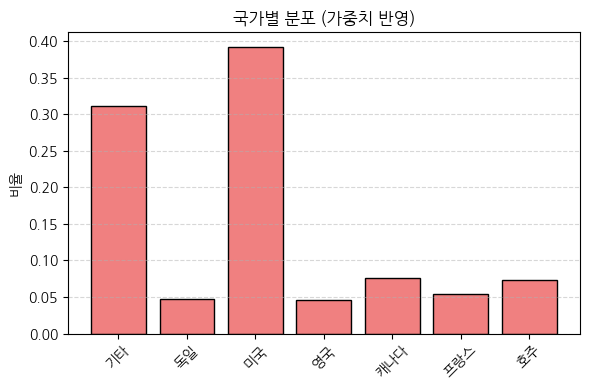

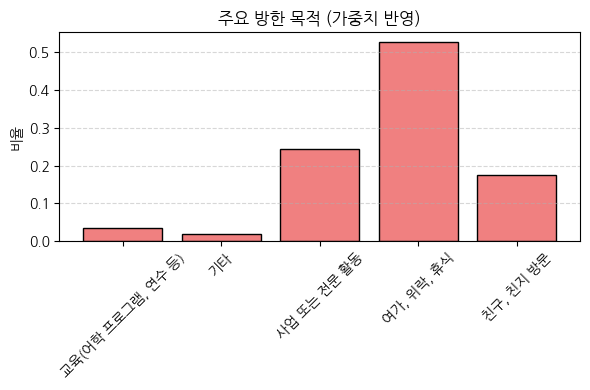

/tmp/ipython-input-17-2123410916.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


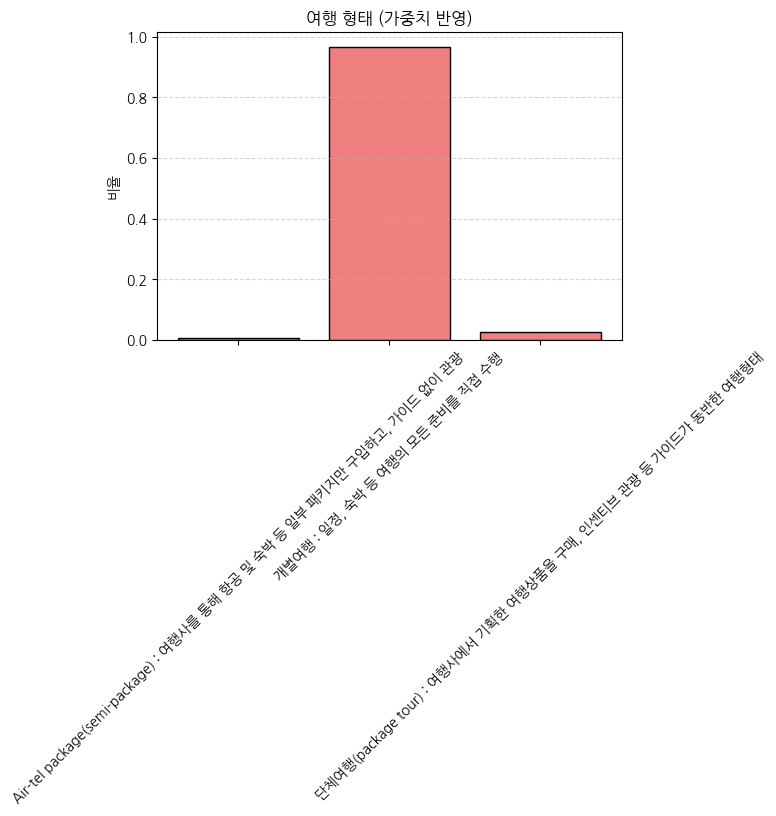

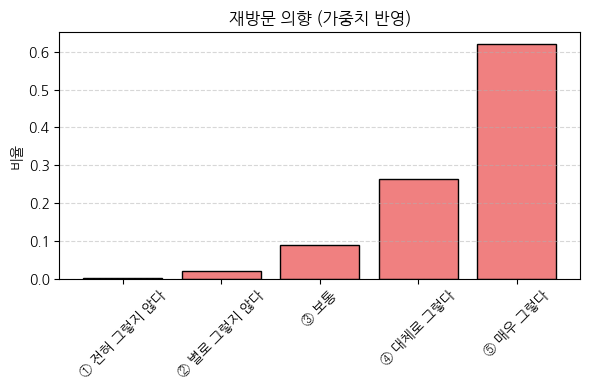

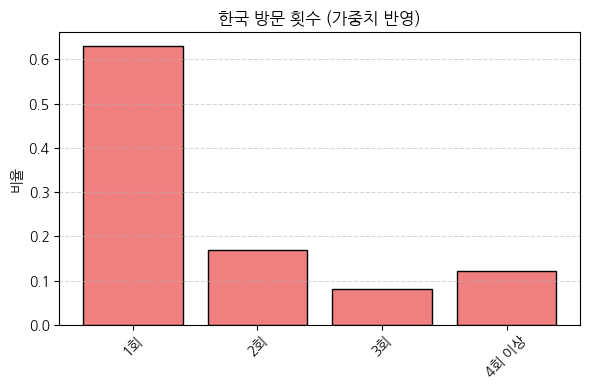

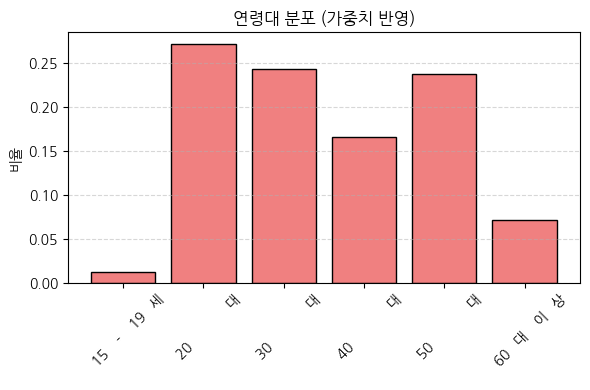

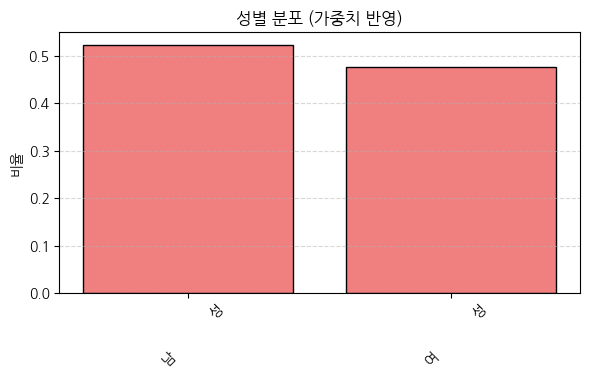

In [ ]:
import matplotlib.pyplot as plt

# 가중치 기반 분포 시각화 함수
def plot_weighted_distribution(df, col, weight_col, title, label_dict=None):
    # 가중치 합산
    weighted_counts = df.groupby(col)[weight_col].sum().sort_index()
    weighted_ratios = weighted_counts / df[weight_col].sum()

    labels = [label_dict.get(k, k) if label_dict else k for k in weighted_ratios.index]

    plt.figure(figsize=(6, 4))
    plt.bar(labels, weighted_ratios.values, color='lightcoral', edgecolor='black')
    plt.title(title + " (가중치 반영)")
    plt.ylabel("비율")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# 국가 분포
plot_weighted_distribution(df_cluster1_2024, 'D_NAT', 'weight', '국가별 분포')

# 방문 목적
Q1_dict = {1: "여가/위락/휴식", 2: "친지 방문", 3: "비즈니스", 4: "교육", 5: "기타"}
plot_weighted_distribution(df_cluster1_2024, 'Q1', 'weight', '주요 방한 목적', Q1_dict)

# 여행 형태
TYP_dict = {1: "개별여행", 2: "에어텔", 3: "단체여행"}
plot_weighted_distribution(df_cluster1_2024, 'TYP', 'weight', '여행 형태', TYP_dict)

#재방문 의향
Q13_dict = {1: "전혀 그렇지 않다", 2: "별로 그렇지 않다", 3: "보통", 4: "대체로 그렇다", 5: "매우 그렇다"}
plot_weighted_distribution(df_cluster1_2024, 'Q13', 'weight', '재방문 의향', Q13_dict)

# 방문 횟수
RVIT_dict = {1: "1회", 2: "2회", 3: "3회", 4: "4회 이상", 5: "재방문"}
plot_weighted_distribution(df_cluster1_2024, 'RVIT', 'weight', '한국 방문 횟수', RVIT_dict)

# 연령대
AGE_dict = {1: "15-19세", 2: "20대", 3: "30대", 4: "40대", 5: "50대", 6: "60대 이상"}
plot_weighted_distribution(df_cluster1_2024, 'D_AGE', 'weight', '연령대 분포', AGE_dict)

# 성별
SEX_dict = {1: "남성", 2: "여성"}
plot_weighted_distribution(df_cluster1_2024, 'D_SEX', 'weight', '성별 분포', SEX_dict)


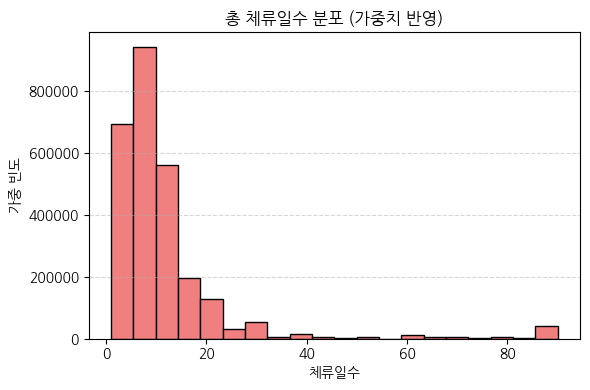

📌 가중 평균 체류일수: 11.62 일
📌 가중 평균 1인 지출액: 3050.6 $


In [ ]:
# 체류일수 히스토그램
plt.figure(figsize=(6, 4))
plt.hist(
    df_cluster1_2024['M일HAP'].dropna(),
    bins=20,
    weights=df_cluster1_2024.loc[df_cluster1_2024['M일HAP'].notna(), 'weight'],
    color='lightcoral',
    edgecolor='black'
)
plt.title("총 체류일수 분포 (가중치 반영)")
plt.xlabel("체류일수")
plt.ylabel("가중 빈도")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 평균 체류일수와 지출액
import numpy as np

stay_mask = df_cluster1_2024['M일HAP'].notna()
spend_mask = df_cluster1_2024['총액1인TOT2'].notna()

weighted_stay = np.average(
    df_cluster1_2024.loc[stay_mask, 'M일HAP'],
    weights=df_cluster1_2024.loc[stay_mask, 'weight']
)

weighted_spend = np.average(
    df_cluster1_2024.loc[spend_mask, '총액1인TOT2'],
    weights=df_cluster1_2024.loc[spend_mask, 'weight']
)

print("📌 가중 평균 체류일수:", round(weighted_stay, 2), "일")
print("📌 가중 평균 1인 지출액:", round(weighted_spend, 2), "$")


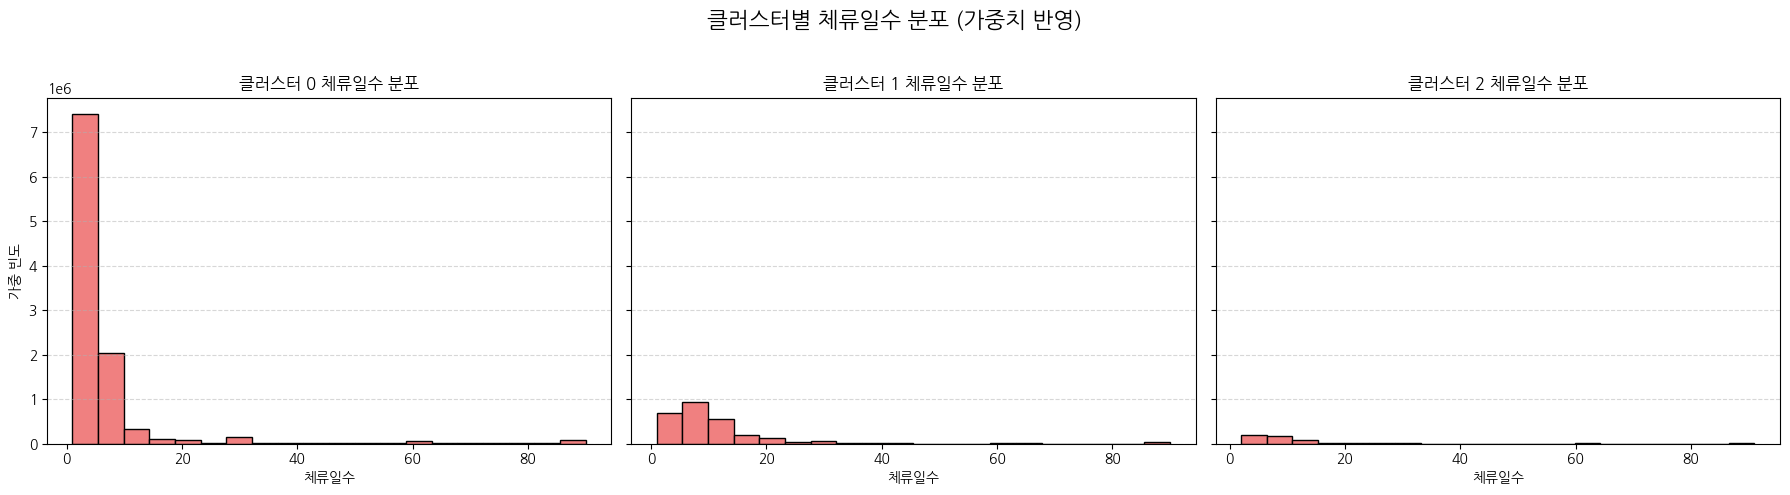

📌 클러스터 0
  - 평균 체류일수: 7.09 일
  - 평균 1인 지출액: 1526.71 $

📌 클러스터 1
  - 평균 체류일수: 11.62 일
  - 평균 1인 지출액: 3050.6 $

📌 클러스터 2
  - 평균 체류일수: 14.44 일
  - 평균 1인 지출액: 2700.46 $



In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

cluster_dfs = {
    "클러스터 0": df_cluster0_2024,
    "클러스터 1": df_cluster1_2024,
    "클러스터 2": df_cluster2_2024,
}

for ax, (name, df) in zip(axes, cluster_dfs.items()):
    mask = df['M일HAP'].notna()
    ax.hist(
        df.loc[mask, 'M일HAP'],
        bins=20,
        weights=df.loc[mask, 'weight'],
        color='lightcoral',
        edgecolor='black'
    )
    ax.set_title(f"{name} 체류일수 분포")
    ax.set_xlabel("체류일수")
    ax.grid(True, axis='y', linestyle='--', alpha=0.5)

axes[0].set_ylabel("가중 빈도")
plt.suptitle("클러스터별 체류일수 분포 (가중치 반영)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

import numpy as np

for name, df in cluster_dfs.items():
    stay_mask = df['M일HAP'].notna()
    spend_mask = df['총액1인TOT2'].notna()

    weighted_stay = np.average(
        df.loc[stay_mask, 'M일HAP'],
        weights=df.loc[stay_mask, 'weight']
    )
    weighted_spend = np.average(
        df.loc[spend_mask, '총액1인TOT2'],
        weights=df.loc[spend_mask, 'weight']
    )

    print(f"📌 {name}")
    print("  - 평균 체류일수:", round(weighted_stay, 2), "일")
    print("  - 평균 1인 지출액:", round(weighted_spend, 2), "$")
    print()


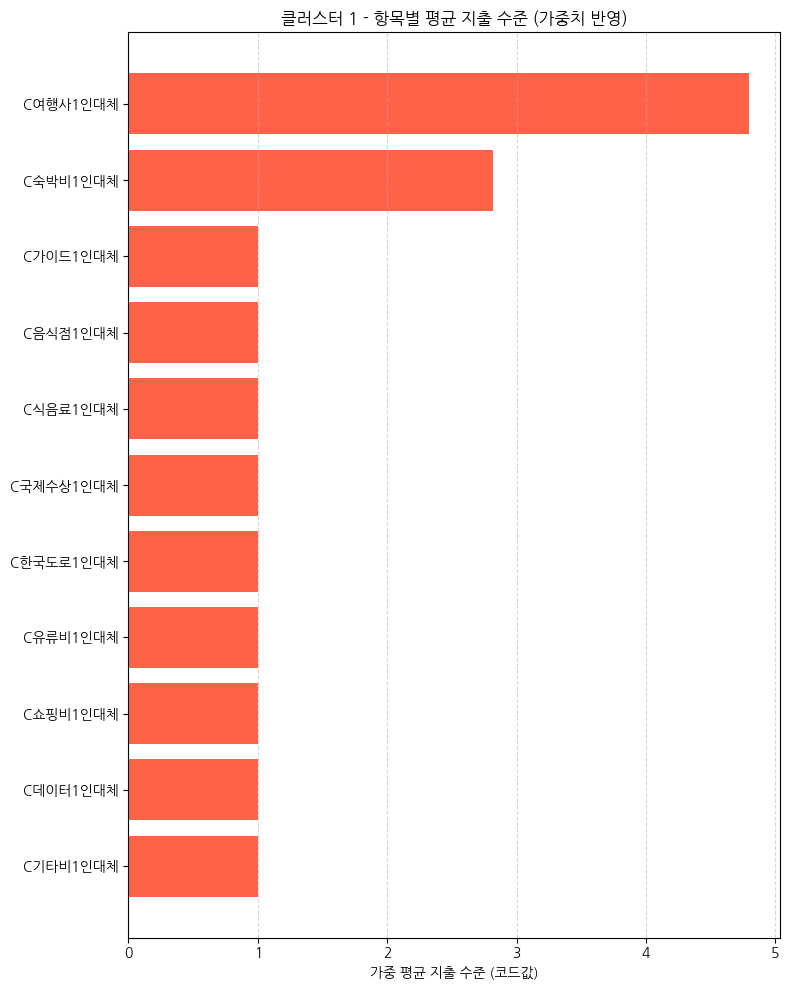

In [ ]:
# 1. 지출 항목 변수 리스트
spending_vars = [
    'C여행사1인대체', 'C가이드1인대체', 'C숙박비1인대체', 'C음식점1인대체', 'C식음료1인대체',
    'C국제운송1인대체', 'C국제육운1인대체', 'C국제수상1인대체', 'C한국국철1인대체', 'C한국국육1인대체',
    'C한국국수1인대체', 'C한국전철1인대체', 'C한국도로1인대체', 'C렌터카1인대체', 'C유류비1인대체',
    'C문화1인대체', 'C오락1인대체', 'C쇼핑비1인대체', 'C데이터1인대체', 'C치료비1인대체',
    'C미용1인대체', 'C기타비1인대체', 'C기타여성품1인대체'
]

# 2. 지출 수준 문자열 → 코드값 매핑
spending_code_map = {
    '0$': 1,
    '100$ 이하': 1,
    '100$ 초과 ~ 200$ 이하': 2,
    '200$ 초과 ~ 500$ 이하': 3,
    '500$ 초과 ~ 1000$ 이하': 4,
    '1000$ 초과': 5
}

# 3. 가중 평균 계산 함수 (문자열 매핑 포함)
def weighted_mean_mapped(series, weights, code_map):
    mapped = series.map(code_map)
    mask = mapped.notna()
    if weights[mask].sum() == 0:
        return np.nan
    return np.average(mapped[mask], weights=weights[mask])

# 4. 항목별 평균 계산
avg_scores = {}
for var in spending_vars:
    if var in df_cluster1_2024.columns:
        avg = weighted_mean_mapped(df_cluster1_2024[var], df_cluster1_2024['weight'], spending_code_map)
        if not np.isnan(avg):
            avg_scores[var] = avg

# 5. 데이터프레임 정리 및 시각화
spending_score_df = pd.DataFrame.from_dict(avg_scores, orient='index', columns=['평균지출코드'])
spending_score_df = spending_score_df.sort_values('평균지출코드', ascending=False)

plt.figure(figsize=(8, 10))
plt.barh(spending_score_df.index, spending_score_df['평균지출코드'], color='tomato')
plt.xlabel("가중 평균 지출 수준 (코드값)")
plt.title("클러스터 1 - 항목별 평균 지출 수준 (가중치 반영)")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


개별여행자가 많은데 왜 여행사에 이렇게 많은 지출을 하지...?

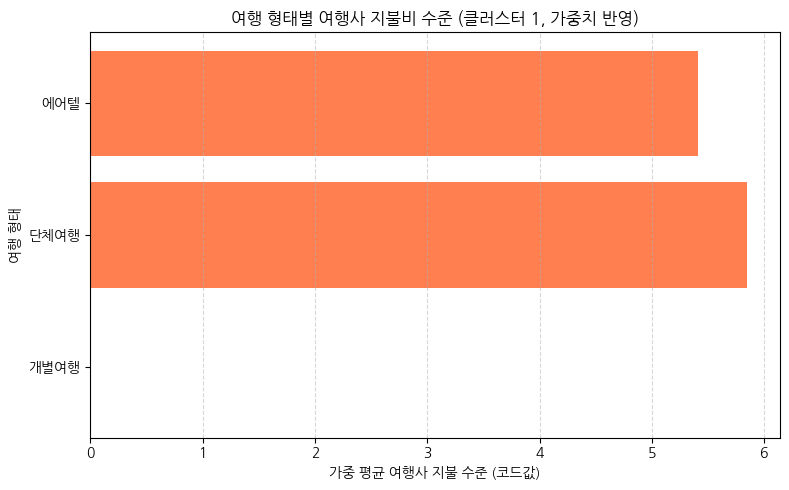

TYP
개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행                                             4016
단체여행(package tour) : 여행사에서 기획한 여행상품을 구매, 인센티브 관광 등 가이드가 동반한 여행형태              119
Air-tel package(semi-package) : 여행사를 통해 항공 및 숙박 등 일부 패키지만 구입하고, 가이드 없이 관광      23
Name: count, dtype: int64


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 코드값 매핑 함수
def spending_to_numeric(value):
    mapping = {
        '0$': 0,
        '50$ 이하': 1,
        '100$ 이하': 1,
        '0$ 초과 ~ 30$ 이하': 1,
        '30$ 초과 ~ 100$ 이하': 2,
        '100$ 초과': 3,
        '100$ 초과 ~ 200$ 이하': 3,
        '200$ 초과 ~ 500$ 이하': 4,
        '500$ 초과 ~ 1000$ 이하': 5,
        '1000$ 초과': 6,
    }
    return mapping.get(value.strip(), np.nan) if isinstance(value, str) else np.nan

# 축약형 이름 사전
label_mapping = {
    '개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행': '개별여행',
    '단체여행(package tour) : 여행사에서 기획한 여행상품을 구매, 인센티브 관광 등 가이드가 동반한 여행형태': '단체여행',
    'Air-tel package(semi-package) : 여행사를 통해 항공 및 숙박 등 일부 패키지만 구입하고, 가이드 없이 관광': '에어텔'
}

# 평균 계산
avg_by_typ = {}
typ_list = df_cluster1_2024['TYP'].dropna().unique()

for typ in typ_list:
    label = label_mapping.get(typ, typ)
    subset = df_cluster1_2024[df_cluster1_2024['TYP'] == typ].copy()
    subset['C여행사1인대체_num'] = subset['C여행사1인대체'].apply(spending_to_numeric)
    mask = subset['C여행사1인대체_num'].notna() & subset['weight'].notna()

    if mask.sum() > 0:
        avg = np.average(subset.loc[mask, 'C여행사1인대체_num'], weights=subset.loc[mask, 'weight'])
        avg_by_typ[label] = avg
    else:
        avg_by_typ[label] = 0  # 응답 없음 → 지출 없음으로 간주

# 시각화
plt.figure(figsize=(8, 5))
plt.barh(list(avg_by_typ.keys()), list(avg_by_typ.values()), color='coral')
plt.xlabel("가중 평균 여행사 지불 수준 (코드값)")
plt.ylabel("여행 형태")
plt.title("여행 형태별 여행사 지불비 수준 (클러스터 1, 가중치 반영)")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 여행 형태별 행 개수 확인
print(df_cluster1_2024['TYP'].value_counts(dropna=False))

허거덩... 단체여행이랑 air-tel에서 이렇게 많은 지출을 여행사에 하고 있었삼...

이것이 클러스터1이 지출이 높았던 이유네...

국제교통비에 많은 지출로 뜨지 않은 이유가 아마 여행사 패키지에 포함이 되지 않을까? 라는 추측

실제 응답자 수를 보면 개별여행객은 전체 클러스터1 중 95% 이상

그런데도 평균 지출액이 높은 것을 보니 소수의 에어텔/단체여행자의 고비용이 전체 평균을 끌어올리고 있음을 확인할 수 있음

In [ ]:
import numpy as np

# 1. 총 평균 지출 (전체 클러스터1 기준)
mask_total = df_cluster1_2024['총액1인TOT2'].notna() & df_cluster1_2024['weight'].notna()
avg_all = np.average(
    df_cluster1_2024.loc[mask_total, '총액1인TOT2'],
    weights=df_cluster1_2024.loc[mask_total, 'weight']
)

# 2. 개별여행자만 필터링 (Air-tel, 단체여행 제외)
TYP_dict = {
    '개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행': '개별',
    '단체여행(package tour) : 여행사에서 기획한 여행상품을 구매, 인센티브 관광 등 가이드가 동반한 여행형태': '단체',
    'Air-tel package(semi-package) : 여행사를 통해 항공 및 숙박 등 일부 패키지만 구입하고, 가이드 없이 관광': '에어텔'
}

df_cluster1_2024['TYP_코드'] = df_cluster1_2024['TYP'].map(TYP_dict)
df_indiv_only = df_cluster1_2024[df_cluster1_2024['TYP_코드'] == '개별']

# 3. 개별여행자 평균 지출
mask_indiv = df_indiv_only['총액1인TOT2'].notna() & df_indiv_only['weight'].notna()
avg_indiv = np.average(
    df_indiv_only.loc[mask_indiv, '총액1인TOT2'],
    weights=df_indiv_only.loc[mask_indiv, 'weight']
)

print("📌 전체 평균 지출 (가중):", round(avg_all, 2), "달러")
print("📌 개별여행자만 평균 지출 (가중):", round(avg_indiv, 2), "달러")


📌 전체 평균 지출 (가중): 3050.6 달러
📌 개별여행자만 평균 지출 (가중): 3009.54 달러


/tmp/ipython-input-22-4204792167.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster1_2024['TYP_코드'] = df_cluster1_2024['TYP'].map(TYP_dict)


/tmp/ipython-input-23-3192357941.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster1_2024['TYP_코드'] = df_cluster1_2024['TYP'].map(TYP_dict)


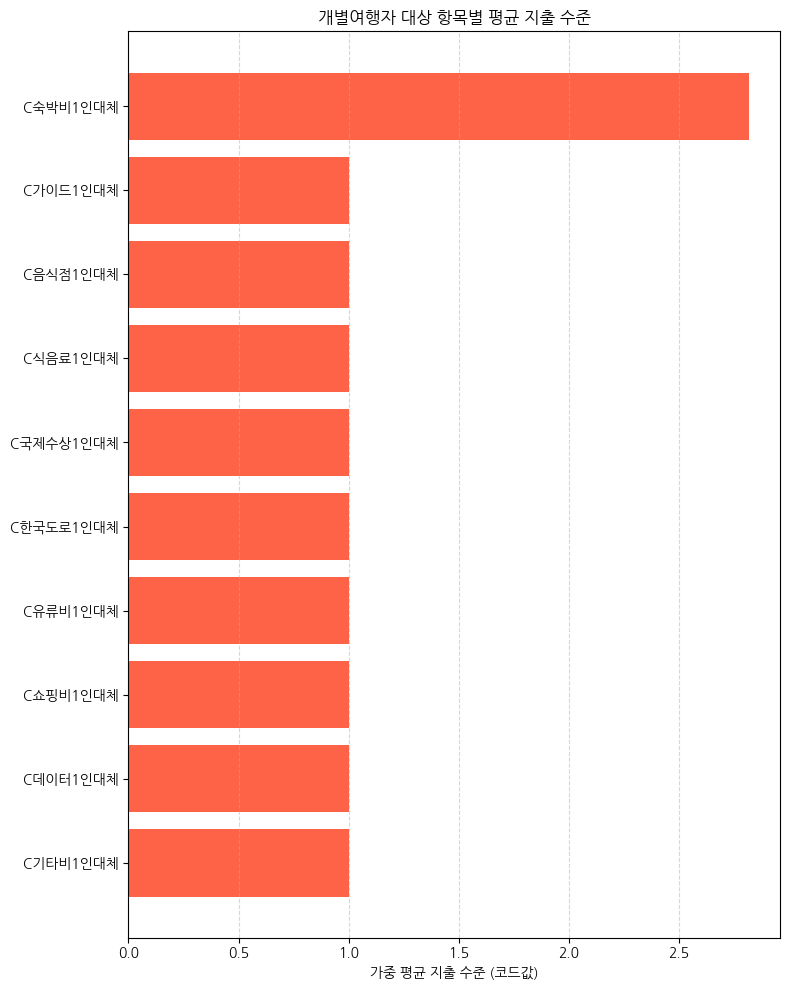

In [ ]:
# 1. 지출 항목 변수 리스트
spending_vars = [
    'C여행사1인대체', 'C가이드1인대체', 'C숙박비1인대체', 'C음식점1인대체', 'C식음료1인대체',
    'C국제운송1인대체', 'C국제육운1인대체', 'C국제수상1인대체', 'C한국국철1인대체', 'C한국국육1인대체',
    'C한국국수1인대체', 'C한국전철1인대체', 'C한국도로1인대체', 'C렌터카1인대체', 'C유류비1인대체',
    'C문화1인대체', 'C오락1인대체', 'C쇼핑비1인대체', 'C데이터1인대체', 'C치료비1인대체',
    'C미용1인대체', 'C기타비1인대체', 'C기타여성품1인대체'
]

# 2. 지출 수준 문자열 → 코드값 매핑
spending_code_map = {
    '0$': 1,
    '100$ 이하': 1,
    '100$ 초과 ~ 200$ 이하': 2,
    '200$ 초과 ~ 500$ 이하': 3,
    '500$ 초과 ~ 1000$ 이하': 4,
    '1000$ 초과': 5
}

# 3. 여행형태 매핑
TYP_dict = {
    '개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행': '개별',
    '단체여행(package tour) : 여행사에서 기획한 여행상품을 구매, 인센티브 관광 등 가이드가 동반한 여행형태': '단체',
    'Air-tel package(semi-package) : 여행사를 통해 항공 및 숙박 등 일부 패키지만 구입하고, 가이드 없이 관광': '에어텔'
}
df_cluster1_2024['TYP_코드'] = df_cluster1_2024['TYP'].map(TYP_dict)

# 4. 개별여행자만 필터링
df_indiv = df_cluster1_2024[df_cluster1_2024['TYP_코드'] == '개별']

# 5. 가중 평균 계산 함수
def weighted_mean_mapped(series, weights, code_map):
    mapped = series.map(code_map)
    mask = mapped.notna()
    if weights[mask].sum() == 0:
        return np.nan
    return np.average(mapped[mask], weights=weights[mask])

# 6. 항목별 평균 계산
avg_scores = {}
for var in spending_vars:
    if var in df_indiv.columns:
        avg = weighted_mean_mapped(df_indiv[var], df_indiv['weight'], spending_code_map)
        if not np.isnan(avg):
            avg_scores[var] = avg

# 7. 시각화용 데이터프레임 생성
spending_score_df = pd.DataFrame.from_dict(avg_scores, orient='index', columns=['평균지출코드'])
spending_score_df = spending_score_df.sort_values('평균지출코드', ascending=False)

# 8. 시각화
plt.figure(figsize=(8, 10))
plt.barh(spending_score_df.index, spending_score_df['평균지출코드'], color='tomato')
plt.xlabel("가중 평균 지출 수준 (코드값)")
plt.title("개별여행자 대상 항목별 평균 지출 수준")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

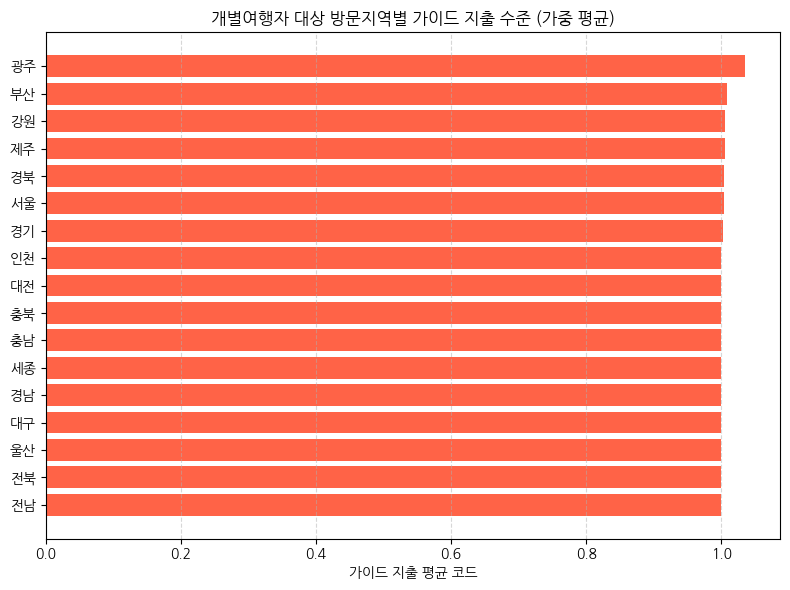

In [ ]:

# ✅ 1. 필요한 변수
region_vars = [f'Q9_2a{str(i).zfill(2)}' for i in range(1, 18)]  # 방문지역 변수명 (Q9_2a01 ~ Q9_2a17)
region_labels = [
    "서울", "경기", "인천", "강원", "대전", "충북", "충남", "세종", "경북",
    "경남", "대구", "울산", "부산", "광주", "전북", "전남", "제주"
]

# ✅ 2. 코드값 매핑
spending_code_map = {
    '0$': 1,
    '100$ 이하': 1,
    '100$ 초과 ~ 200$ 이하': 2,
    '200$ 초과 ~ 500$ 이하': 3,
    '500$ 초과 ~ 1000$ 이하': 4,
    '1000$ 초과': 5
}

# ✅ 3. 개별여행자 + 가이드 응답 있는 사람만 필터링
df_guide = df_cluster1_2024[
    (df_cluster1_2024["TYP_코드"] == "개별") &
    (df_cluster1_2024["C가이드1인대체"].notna())
].copy()

# ✅ 4. 지역별 평균 지출코드 계산
region_scores = {}
for var, label in zip(region_vars, region_labels):
    # 해당 지역 방문한 사람 중
    subset = df_guide[df_guide[var] == label]
    if len(subset) == 0:
        continue

    # 가이드 지출코드 매핑
    mapped = subset["C가이드1인대체"].map(spending_code_map)
    mask = mapped.notna()
    if mask.sum() == 0:
        continue

    # 가중 평균 계산
    score = np.average(mapped[mask], weights=subset.loc[mask, "weight"])
    region_scores[label] = score

# ✅ 5. 히트맵 형태로 시각화 (막대그래프)
region_scores = dict(sorted(region_scores.items(), key=lambda x: x[1], reverse=True))
labels = list(region_scores.keys())
values = list(region_scores.values())

plt.figure(figsize=(8, 6))
plt.barh(labels, values, color='tomato')
plt.xlabel("가이드 지출 평균 코드")
plt.title("개별여행자 대상 방문지역별 가이드 지출 수준 (가중 평균)")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## 1회 방문자와 재방문자 비교


클러스터1의 EDA결과:

단체 여행자의 영향 없이도, 개별 여행자만으로도 평균지출이 매우 높음을 확인하여 고부가가치층의 타깃 정당성을 확보함!

이제 재방문율이 왜 낮은지를 파악할 순서

재방문자와 1회 방문자간의 차이분석을 통해

✔️ 재방문을 유도할 수 있는 요인을 찾을 수 있음.

✔️ 특히 만족했는데도, 왜 재방문을 안할까? 라는 질문에 대한 답을 찾는 것을 목표

[비교할 항목 리스트]

| 항목 종류              | 변수 예시 (코드북 기준 추정)                     | 분석 방식 예시               |
| ------------------ | ------------------------------------- | ---------------------- |
| **① 체험한 활동**       | `Q2_3a3at ~ Q2_3a3et` 등               | 항목별 참여율 비교 (막대그래프/히트맵) |
| **② 만족한 활동**       | `Q2_3b2a ~ Q2_3b2b` 등                 | 활동별 만족도 비율             |
| **③ 방문지역**         | `Q9_2a01 ~ Q9_2a17`                   | 지역별 방문 비율 히트맵          |
| **④ 소비항목**         | `C숙박비1인대체`, `C가이드1인대체` 등 23개          | 가중 평균 지출 코드 비교         |
| **⑤ 동반자 수**        | `Q1_2` 혹은 `Q1_1a1~a3` (동반자 유형 수)      | 평균 동반자 수 or 유형 분포      |
| **⑥ 부족했던 정보**      | `Q2_2a` (복수응답)                        | 항목별 응답비율 막대그래프         |
| **⑦ 한국 정보 경로**     | `Q2a1 ~ Q2a3`, `Q2a_dk` (정보 출처)       | 출처별 비율 stacked bar 등   |
| **⑧ 고려한 인프라**      | `ZQ2_31 ~ ZQ2_34` (인프라 중요도)           | 평균 중요도 비교 barplot      |
| **⑨ 숙박일수**         | `N_NIGHT`                             | 평균 숙박일수 비교 (boxplot)   |
| **⑩ 만족도 (전체/항목별)** | `ZQ3_1 ~ ZQ3_8` 또는 `Q3_1` (전반/항목 만족도) | 평균 점수 비교 barplot       |


## 집단구분

In [ ]:
# 문자열 정리: '1회', '2회', ..., '4회 이상' → 숫자로 통일 ('4회 이상'은 4로 처리)
def map_rvit(val):
    if '1회' in val:
        return 1
    elif '2회' in val:
        return 2
    elif '3회' in val:
        return 3
    elif '4회' in val:
        return 4
    else:
        return np.nan

df_cluster1_2024['RVIT_수치'] = df_cluster1_2024['RVIT'].map(map_rvit)

# 집단 나누기
df_once = df_cluster1_2024[df_cluster1_2024['RVIT_수치'] == 1]
df_repeat = df_cluster1_2024[df_cluster1_2024['RVIT_수치'] >= 2]

/tmp/ipython-input-25-91897113.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster1_2024['RVIT_수치'] = df_cluster1_2024['RVIT'].map(map_rvit)


##  1회 방문자 vs 재방문자 비교: 참여한 활동 (Q8a01~Q8a20)

In [ ]:
activity_vars = [f'Q8a{str(i).zfill(2)}' for i in range(1, 21)]
activity_vars

['Q8a01',
 'Q8a02',
 'Q8a03',
 'Q8a04',
 'Q8a05',
 'Q8a06',
 'Q8a07',
 'Q8a08',
 'Q8a09',
 'Q8a10',
 'Q8a11',
 'Q8a12',
 'Q8a13',
 'Q8a14',
 'Q8a15',
 'Q8a16',
 'Q8a17',
 'Q8a18',
 'Q8a19',
 'Q8a20']

In [ ]:
# 가중 응답률 계산
def weighted_response_rate(df, columns, weight_col='weight'):
    rates = {}
    for col in columns:
        if col in df.columns:
            valid = df[col] == 1
            weight = df[weight_col]
            if valid.any():
                rate = np.average(valid, weights=weight)
                rates[col] = rate
    return rates

once_rates = weighted_response_rate(df_once, activity_vars)
repeat_rates = weighted_response_rate(df_repeat, activity_vars)

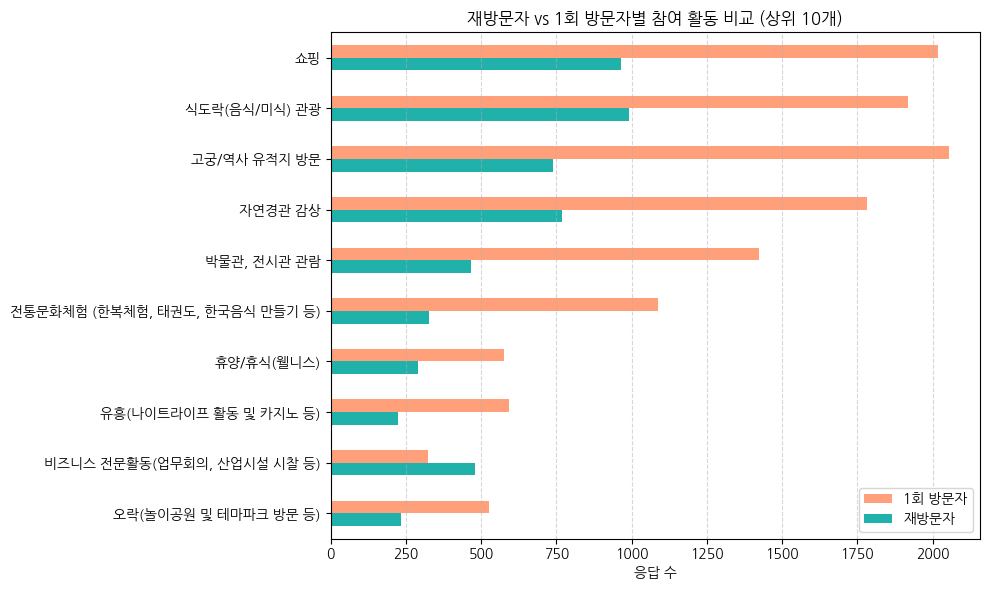

In [ ]:
# 1. 변수 목록 설정
activity_vars = [f'Q8a{str(i).zfill(2)}' for i in range(1, 21)]

# 2. 참여한 활동만 있는 항목들 추출
def get_activity_counts(df, group_name):
    all_vals = pd.Series(dtype='str')
    for var in activity_vars:
        if var in df.columns:
            all_vals = pd.concat([all_vals, df[var].dropna().astype(str)])
    counts = all_vals.value_counts().sort_values(ascending=False)
    return counts.rename(group_name)

# 3. 재방문자 / 1회 방문자별 활동 횟수 비교
once_activity = get_activity_counts(df_once, '1회 방문자')
repeat_activity = get_activity_counts(df_repeat, '재방문자')

# 4. 병합 후 비율 정리
activity_compare_df = pd.concat([once_activity, repeat_activity], axis=1).fillna(0)
activity_compare_df['총합'] = activity_compare_df.sum(axis=1)
activity_compare_df = activity_compare_df.sort_values('총합', ascending=False)

# 5. 시각화 (상위 10개 항목)
activity_compare_df[['1회 방문자', '재방문자']].head(10).plot(
    kind='barh', figsize=(10, 6), color=['#FFA07A', '#20B2AA']
)
plt.title("재방문자 vs 1회 방문자별 참여 활동 비교 (상위 10개)")
plt.xlabel("응답 수")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


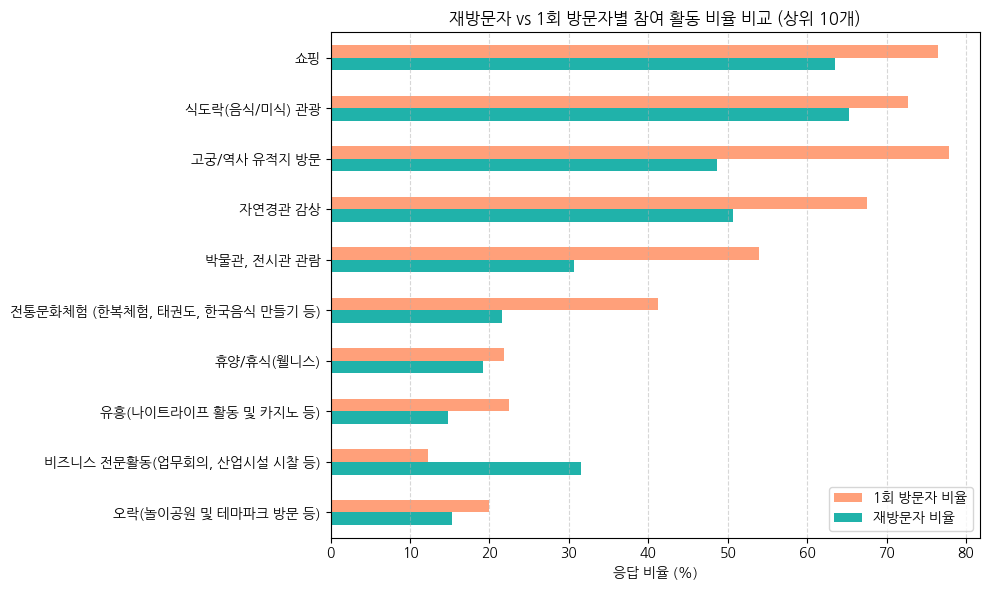

In [ ]:
# 총 응답자 수
n_once = len(df_once)
n_repeat = len(df_repeat)

# 비율로 환산 (총 응답자 수로 나눔)
activity_compare_df['1회 방문자 비율'] = activity_compare_df['1회 방문자'] / n_once * 100
activity_compare_df['재방문자 비율'] = activity_compare_df['재방문자'] / n_repeat * 100

# 시각화 (비율 기준, 상위 10개)
activity_compare_df[['1회 방문자 비율', '재방문자 비율']].head(10).plot(
    kind='barh', figsize=(10, 6), color=['#FFA07A', '#20B2AA']
)
plt.title("재방문자 vs 1회 방문자별 참여 활동 비율 비교 (상위 10개)")
plt.xlabel("응답 비율 (%)")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##만족한 활동 (Q8_1a1 ~ Q8_1a3)

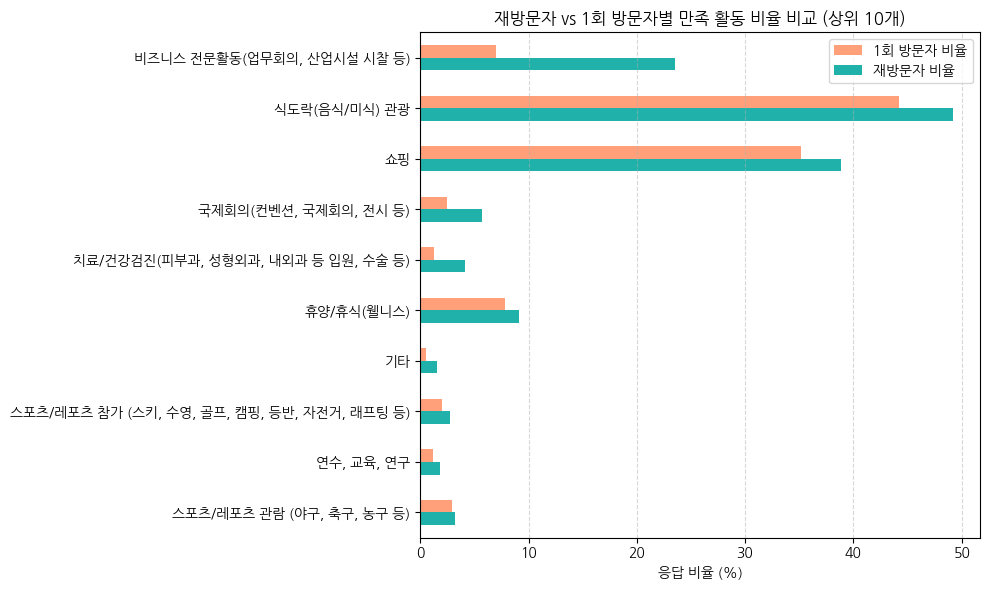

In [ ]:
# 변수 목록
satis_vars = [f'Q8_1a{i}' for i in range(1, 4)]

# 전체 만족 활동 추출
df_satis = df_cluster1_2024[satis_vars + ['RVIT']].copy()

# 그룹 분리
df_satis_once = df_satis[df_satis['RVIT'] == '1회']
df_satis_repeat = df_satis[df_satis['RVIT'] != '1회']

# 함수: 항목별 응답 수 집계
from collections import Counter

def count_values(df, cols):
    all_values = pd.concat([df[col] for col in cols])
    counts = Counter(all_values.dropna())
    return dict(counts)

# 응답 수 집계
once_counts = count_values(df_satis_once, satis_vars)
repeat_counts = count_values(df_satis_repeat, satis_vars)

# 데이터프레임 정리
satis_compare_df = pd.DataFrame([once_counts, repeat_counts]).T
satis_compare_df.columns = ['1회 방문자', '재방문자']
satis_compare_df = satis_compare_df.fillna(0)

# 총 응답자 수
n_once = len(df_satis_once)
n_repeat = len(df_satis_repeat)

# 비율로 변환
satis_compare_df['1회 방문자 비율'] = satis_compare_df['1회 방문자'] / n_once * 100
satis_compare_df['재방문자 비율'] = satis_compare_df['재방문자'] / n_repeat * 100

# 시각화 (차이 큰 순으로 정렬)
satis_compare_df['차이'] = satis_compare_df['재방문자 비율'] - satis_compare_df['1회 방문자 비율']
satis_compare_df_sorted = satis_compare_df.sort_values(by='차이', ascending=False)

# 그래프
satis_compare_df_sorted[['1회 방문자 비율', '재방문자 비율']].head(10).plot(
    kind='barh', figsize=(10, 6), color=['#FFA07A', '#20B2AA']
)
plt.title("재방문자 vs 1회 방문자별 만족 활동 비율 비교 (상위 10개)")
plt.xlabel("응답 비율 (%)")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


*  식도락 관광, 쇼핑에서 재방문자 만족도가 더 높게 나타남.

* 반대로 **문화체험(전통/공연/한류)**에 대한 만족은 낮은 편



##  방문지역별 응답 비율 비교 (재방문자 vs 1회 방문자)

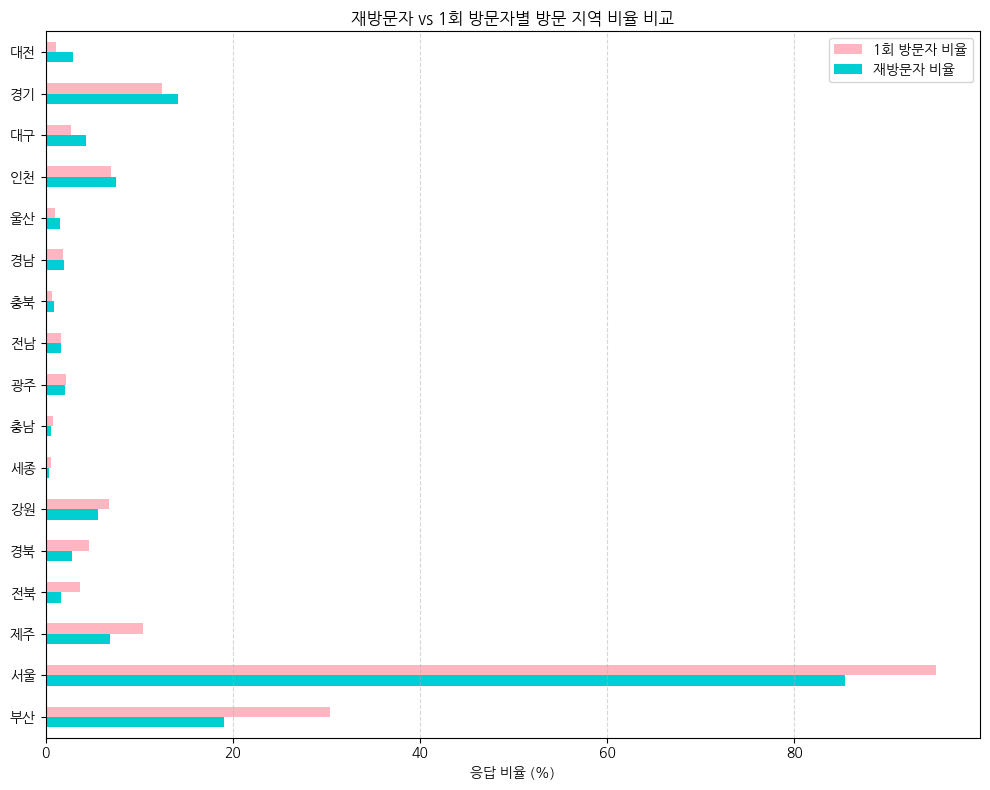

In [ ]:
# 방문 지역 변수 및 레이블
region_vars = [f'Q9_2a{str(i).zfill(2)}' for i in range(1, 18)]
region_labels = [
    '서울', '경기', '인천', '강원', '대전', '충북', '충남', '세종', '경북',
    '경남', '대구', '울산', '부산', '광주', '전북', '전남', '제주'
]

# 재방문자 vs 1회방문자 분리
df_once = df_cluster1_2024[df_cluster1_2024['RVIT'] == '1회']
df_repeat = df_cluster1_2024[df_cluster1_2024['RVIT'] != '1회']

# 응답자 수
n_once = len(df_once)
n_repeat = len(df_repeat)

# 지역별 비율 계산 함수
def region_response_rate(df, region_cols, labels):
    rates = {}
    for col, label in zip(region_cols, labels):
        if col in df.columns:
            rate = df[col].notna().sum() / len(df) * 100
            rates[label] = rate
    return rates

# 비율 계산
rate_once = region_response_rate(df_once, region_vars, region_labels)
rate_repeat = region_response_rate(df_repeat, region_vars, region_labels)

# 비교용 데이터프레임 생성
region_compare_df = pd.DataFrame([rate_once, rate_repeat]).T
region_compare_df.columns = ['1회 방문자 비율', '재방문자 비율']
region_compare_df['차이'] = region_compare_df['재방문자 비율'] - region_compare_df['1회 방문자 비율']
region_compare_df_sorted = region_compare_df.sort_values(by='차이', ascending=False)

# 그래프
region_compare_df_sorted[['1회 방문자 비율', '재방문자 비율']].plot(
    kind='barh', figsize=(10, 8), color=['#FFB6C1', '#00CED1']
)
plt.title("재방문자 vs 1회 방문자별 방문 지역 비율 비교")
plt.xlabel("응답 비율 (%)")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


뭔가 이거 지역분산 전략에 활용할 수 있을까?

##  항목별 지출 수준 비교

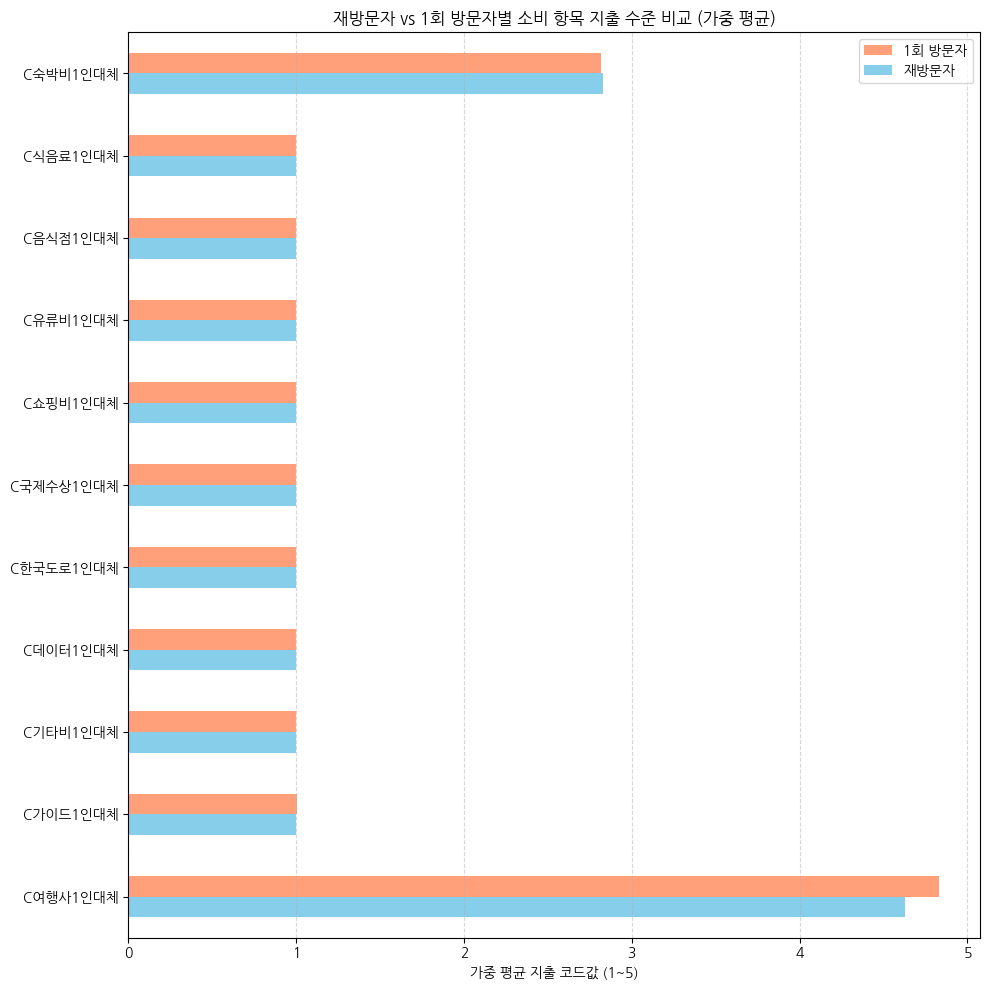

In [ ]:
# 소비 항목 변수 리스트
spending_vars = [
    'C여행사1인대체', 'C가이드1인대체', 'C숙박비1인대체', 'C음식점1인대체', 'C식음료1인대체',
    'C국제운송1인대체', 'C국제육운1인대체', 'C국제수상1인대체', 'C한국국철1인대체', 'C한국국육1인대체',
    'C한국국수1인대체', 'C한국전철1인대체', 'C한국도로1인대체', 'C렌터카1인대체', 'C유류비1인대체',
    'C문화1인대체', 'C오락1인대체', 'C쇼핑비1인대체', 'C데이터1인대체', 'C치료비1인대체',
    'C미용1인대체', 'C기타비1인대체', 'C기타여성품1인대체'
]

# 문자열 → 코드값 매핑
spending_code_map = {
    '0$': 1,
    '100$ 이하': 1,
    '100$ 초과 ~ 200$ 이하': 2,
    '200$ 초과 ~ 500$ 이하': 3,
    '500$ 초과 ~ 1000$ 이하': 4,
    '1000$ 초과': 5
}

# 가중 평균 계산 함수
def weighted_mean_mapped(series, weights, code_map):
    mapped = series.map(code_map)
    mask = mapped.notna()
    if weights[mask].sum() == 0:
        return np.nan
    return np.average(mapped[mask], weights=weights[mask])

# 두 집단 평균 계산
avg_spend_once = {}
avg_spend_repeat = {}

for var in spending_vars:
    if var in df_cluster1_2024.columns:
        avg_spend_once[var] = weighted_mean_mapped(df_once[var], df_once['weight'], spending_code_map)
        avg_spend_repeat[var] = weighted_mean_mapped(df_repeat[var], df_repeat['weight'], spending_code_map)

# 데이터프레임 생성
spending_df = pd.DataFrame({
    '1회 방문자': avg_spend_once,
    '재방문자': avg_spend_repeat
}).dropna()

spending_df['차이'] = spending_df['재방문자'] - spending_df['1회 방문자']
spending_df = spending_df.sort_values('차이', ascending=False)

# 시각화
spending_df[['1회 방문자', '재방문자']].plot(
    kind='barh', figsize=(10, 10), color=['#FFA07A', '#87CEEB']
)
plt.title("재방문자 vs 1회 방문자별 소비 항목 지출 수준 비교 (가중 평균)")
plt.xlabel("가중 평균 지출 코드값 (1~5)")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# 소비 항목 변수 리스트
spending_vars = [
    'C여행사1인대체', 'C가이드1인대체', 'C숙박비1인대체', 'C음식점1인대체', 'C식음료1인대체',
    'C국제운송1인대체', 'C국제육운1인대체', 'C국제수상1인대체', 'C한국국철1인대체', 'C한국국육1인대체',
    'C한국국수1인대체', 'C한국전철1인대체', 'C한국도로1인대체', 'C렌터카1인대체', 'C유류비1인대체',
    'C문화1인대체', 'C오락1인대체', 'C쇼핑비1인대체', 'C데이터1인대체', 'C치료비1인대체',
    'C미용1인대체', 'C기타비1인대체', 'C기타여성품1인대체'
]

# 1. 클러스터 리스트와 이름 정의
cluster_dfs = {
    '클러스터 0': df_cluster0_2024,
    '클러스터 1': df_cluster1_2024,
    '클러스터 2': df_cluster2_2024,
}

# 2. 문자열 코드값 매핑
spending_code_map = {
    '0$': 1,
    '100$ 이하': 1,
    '100$ 초과 ~ 200$ 이하': 2,
    '200$ 초과 ~ 500$ 이하': 3,
    '500$ 초과 ~ 1000$ 이하': 4,
    '1000$ 초과': 5
}

# 3. 가중 평균 함수
def weighted_mean_mapped(series, weights, code_map):
    mapped = series.map(code_map) if series.dtype == object else series
    mask = mapped.notna()
    if weights[mask].sum() == 0:
        return np.nan
    return np.average(mapped[mask], weights=weights[mask])

# 4. 클러스터별 평균 계산
cluster_spending_means = {}

for cluster_name, df in cluster_dfs.items():
    cluster_avg = {}
    for var in spending_vars:
        if var in df.columns:
            cluster_avg[var] = weighted_mean_mapped(df[var], df['weight'], spending_code_map)
    cluster_spending_means[cluster_name] = cluster_avg

# 5. 데이터프레임 생성 및 정리
spending_cluster_df = pd.DataFrame(cluster_spending_means)
spending_cluster_df['차이(1-0)'] = spending_cluster_df['클러스터 1'] - spending_cluster_df['클러스터 0']
spending_cluster_df['차이(1-2)'] = spending_cluster_df['클러스터 1'] - spending_cluster_df['클러스터 2']
spending_cluster_df = spending_cluster_df.sort_values('클러스터 1', ascending=False)


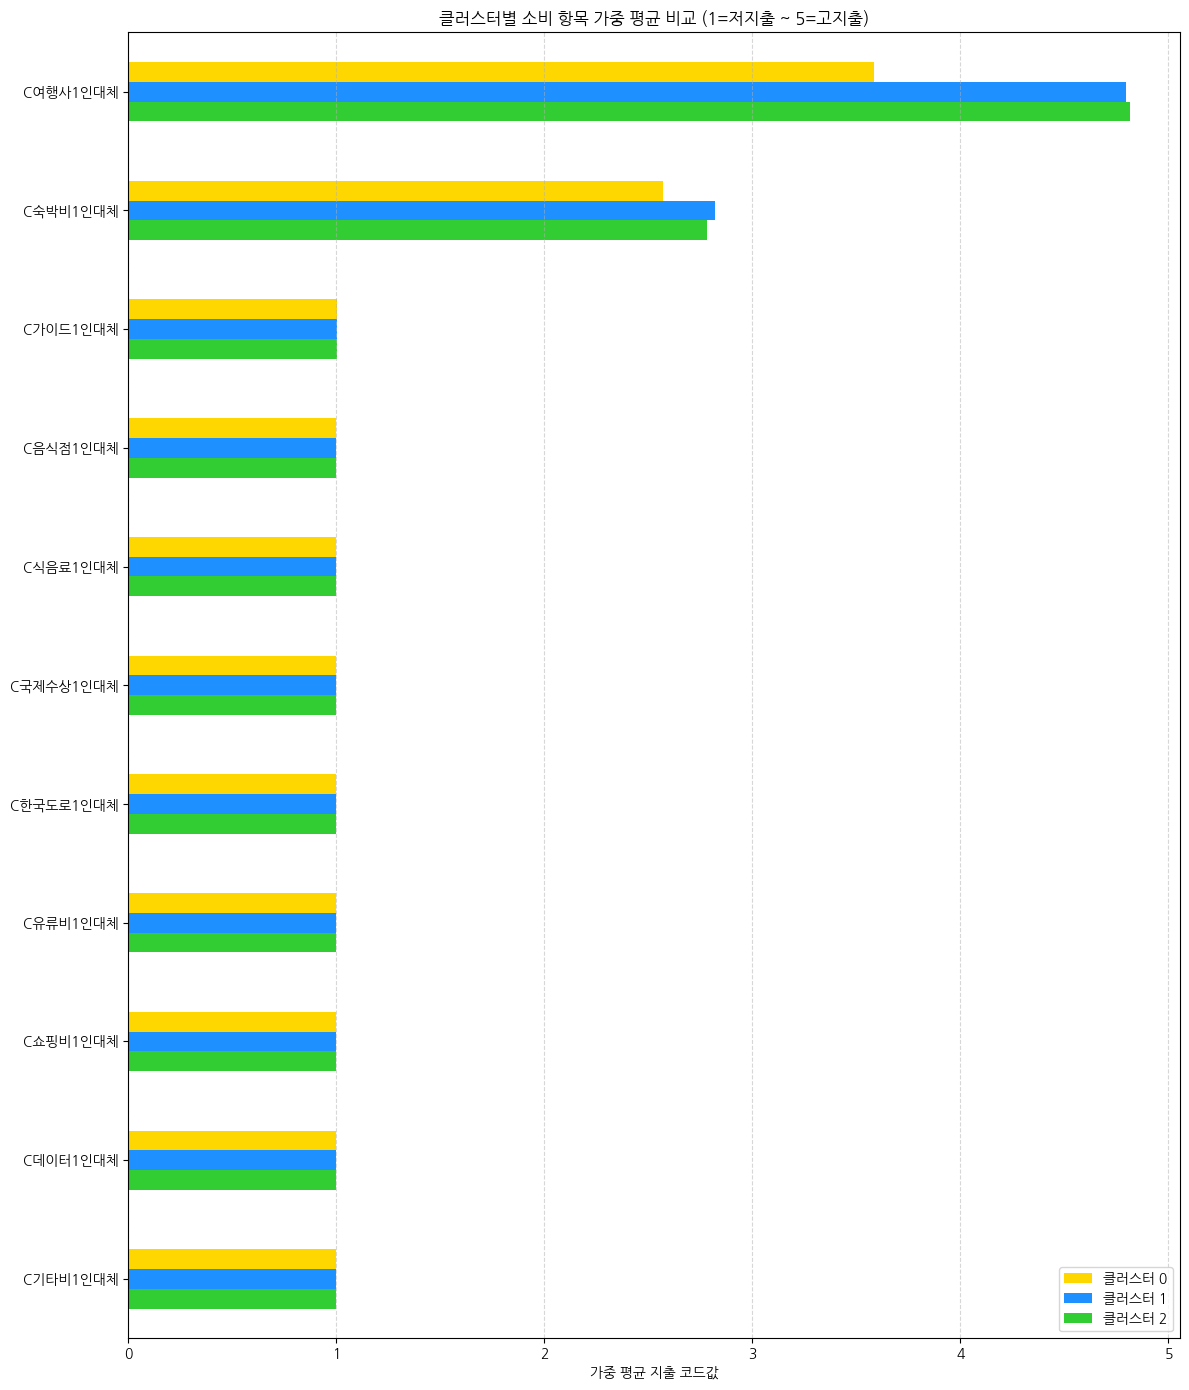

In [ ]:
# 클러스터별 지출 항목 비교 시각화
spending_cluster_df[['클러스터 0', '클러스터 1', '클러스터 2']].plot(
    kind='barh', figsize=(12, 14), color=['#FFD700', '#1E90FF', '#32CD32']
)
plt.title("클러스터별 소비 항목 가중 평균 비교 (1=저지출 ~ 5=고지출)")
plt.xlabel("가중 평균 지출 코드값")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# 가중 평균 계산 함수 정의
def weighted_avg(series, weights):
    mask = series.notna() & weights.notna()
    if mask.sum() == 0:
        return np.nan
    return np.average(series[mask], weights=weights[mask])

# 비교 대상 지출 항목
spending_total_vars = ['총액1인TOT2', '총액1인TOT_개별국제교통비제외2']

# 클러스터별 데이터프레임 딕셔너리
cluster_dfs = {
    '클러스터 0': df_cluster0_2024,
    '클러스터 1': df_cluster1_2024,
    '클러스터 2': df_cluster2_2024,
}

# 결과 저장용 리스트
results = []

# 계산 루프
for cluster_name, df in cluster_dfs.items():
    for var in spending_total_vars:
        if var in df.columns:
            avg = weighted_avg(df[var], df['weight'])
            results.append((cluster_name, var, avg))

# 결과 출력
for cluster_name, var, avg in results:
    print(f"[{cluster_name}] {var} 평균 지출: {avg:,.2f} USD")


[클러스터 0] 총액1인TOT2 평균 지출: 1,526.71 USD
[클러스터 0] 총액1인TOT_개별국제교통비제외2 평균 지출: 1,275.74 USD
[클러스터 1] 총액1인TOT2 평균 지출: 3,050.60 USD
[클러스터 1] 총액1인TOT_개별국제교통비제외2 평균 지출: 1,623.97 USD
[클러스터 2] 총액1인TOT2 평균 지출: 2,700.46 USD
[클러스터 2] 총액1인TOT_개별국제교통비제외2 평균 지출: 1,946.47 USD


## 동반자 수 비교 (RQ7_1제외)

/tmp/ipython-input-36-3957526695.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_once[col_partner] = df_once[col_partner].map(partner_map)
/tmp/ipython-input-36-3957526695.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_repeat[col_partner] = df_repeat[col_partner].map(partner_map)


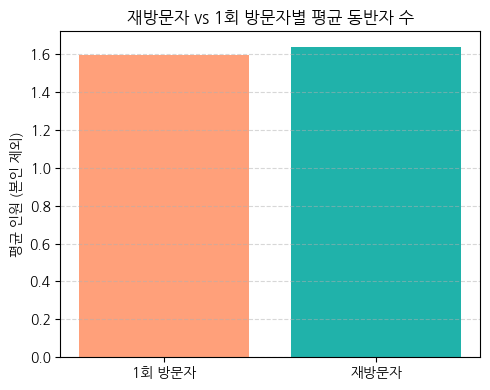

In [ ]:
# 0. 함수 정의
def weighted_avg(series, weights):
    mask = series.notna() & weights.notna()
    if mask.sum() == 0:
        return np.nan
    return np.average(series[mask], weights=weights[mask])

# 1. 변수 지정
col_partner = 'RQ7_1제외'

# 2. 동반자 수 텍스트 → 숫자 매핑
partner_map = {'1명': 1, '2명': 2, '3명이상': 3}
df_once[col_partner] = df_once[col_partner].map(partner_map)
df_repeat[col_partner] = df_repeat[col_partner].map(partner_map)

# 3. 평균 계산
avg_partner_once = weighted_avg(df_once[col_partner], df_once['weight'])
avg_partner_repeat = weighted_avg(df_repeat[col_partner], df_repeat['weight'])

# 4. 시각화
plt.figure(figsize=(5, 4))
plt.bar(['1회 방문자', '재방문자'], [avg_partner_once, avg_partner_repeat],
        color=['#FFA07A', '#20B2AA'])
plt.title("재방문자 vs 1회 방문자별 평균 동반자 수")
plt.ylabel("평균 인원 (본인 제외)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# 전체에서 이 컬럼의 값 분포 확인
print("전체 값 분포:", df_cluster1_2024['RQ7_1제외'].value_counts(dropna=False))

# 재방문자에서 값 분포 확인
print("재방문자 값 분포:", df_repeat['RQ7_1제외'].value_counts(dropna=False))

# 결측 비율 확인
print("재방문자 동반자 응답률:", df_repeat['RQ7_1제외'].notna().mean())

전체 값 분포: RQ7_1제외
1명      1617
NaN     1567
3명이상     561
2명       413
Name: count, dtype: int64
재방문자 값 분포: RQ7_1제외
NaN    779
1.0    447
3.0    172
2.0    121
Name: count, dtype: int64
재방문자 동반자 응답률: 0.4871626069782752


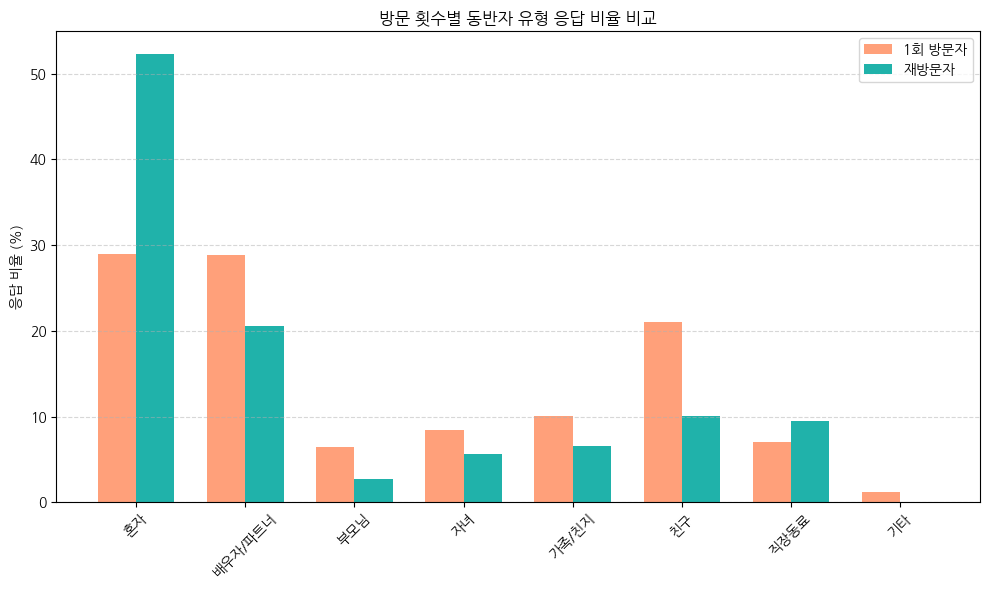

In [ ]:
# 1. 동반자 유형 변수 (혼자: Q7a_dk, 나머지: Q7a2 ~ Q7a8)
companion_vars = ['Q7a_dk'] + [f'Q7a{i}' for i in range(2, 9)]

# 2. 동반자 유형 라벨 (Q7a_dk = 혼자)
labels = ['혼자', '배우자/파트너', '부모님', '자녀', '가족/친지', '친구', '직장동료', '기타']

# 3. 비율 계산 함수 (가중 응답자 비율)
def calc_weighted_ratio(df, columns, weight_col):
    result = {}
    for col in columns:
        mask = df[col].notna()
        if mask.sum() == 0:
            result[col] = 0
        else:
            result[col] = df.loc[mask, weight_col].sum() / df[weight_col].sum()
    return result

# 4. 비율 계산
ratio_once = calc_weighted_ratio(df_once, companion_vars, 'weight')
ratio_repeat = calc_weighted_ratio(df_repeat, companion_vars, 'weight')

# 5. 정리
ratios_df = pd.DataFrame({
    '동반자 유형': labels,
    '1회 방문자': [ratio_once[col]*100 for col in companion_vars],
    '재방문자': [ratio_repeat[col]*100 for col in companion_vars]
})

# 6. 시각화
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, ratios_df['1회 방문자'], width, label='1회 방문자', color='#FFA07A')
plt.bar(x + width/2, ratios_df['재방문자'], width, label='재방문자', color='#20B2AA')

plt.xticks(x, labels, rotation=45)
plt.ylabel('응답 비율 (%)')
plt.title('방문 횟수별 동반자 유형 응답 비율 비교')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


- 재방문자는 ‘혼자’ 비율이 높고, 1회 방문자는 ‘배우자/친구/가족’와 함께

- 재방문자는 더 자유로운 여행 패턴을 가지는 경향 + 직장동료



## 부족했던 정보

In [ ]:
df_cluster1_2024['Q4_2a_dk'].unique()

array(['없다', nan], dtype=object)

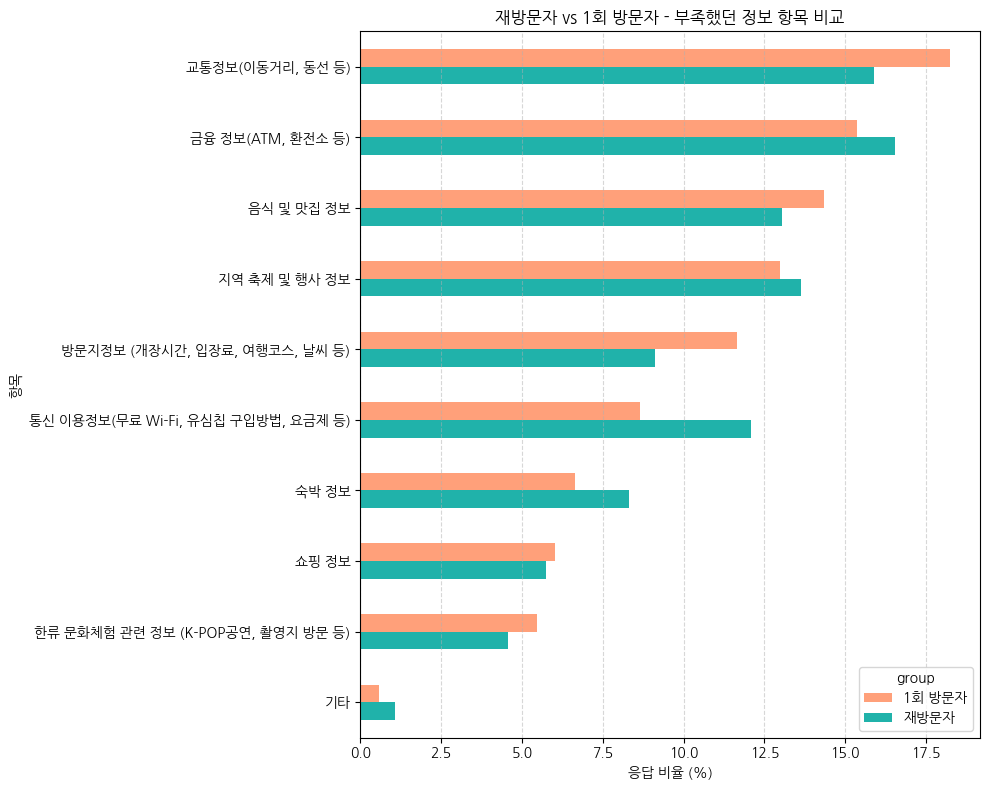

In [ ]:
# 1. 관련 변수
q42_cols = ['Q4_2a1', 'Q4_2a2', 'Q4_2a3']

# 2. 두 그룹 데이터 결합
df_once_q42 = df_once[q42_cols + ['weight']].copy()
df_once_q42['group'] = '1회 방문자'

df_repeat_q42 = df_repeat[q42_cols + ['weight']].copy()
df_repeat_q42['group'] = '재방문자'

df_q42_all = pd.concat([df_once_q42, df_repeat_q42], ignore_index=True)

# 3. 항목별로 펼치기
melted = df_q42_all.melt(id_vars=['weight', 'group'], value_vars=q42_cols,
                         value_name='항목').dropna(subset=['항목'])

# 4. 항목별 그룹별 가중치 합 → 전체 가중치 대비 비율
group_total_weight = melted.groupby('group')['weight'].sum().to_dict()

# 5. 응답 항목별 그룹별 가중 응답 비율 계산
summary = (
    melted.groupby(['group', '항목'])['weight'].sum()
    .reset_index()
)
summary['비율'] = summary.apply(
    lambda row: row['weight'] / group_total_weight[row['group']] * 100, axis=1
)

# 6. 피벗 (그룹별 비교)
pivot_df = summary.pivot(index='항목', columns='group', values='비율').fillna(0)
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]  # 응답 많은 순 정렬

# 7. 시각화
pivot_df.plot(kind='barh', figsize=(10, 8), color=['#FFA07A', '#20B2AA'])
plt.xlabel('응답 비율 (%)')
plt.title('재방문자 vs 1회 방문자 - 부족했던 정보 항목 비교')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## 정보 획득 경로 비교

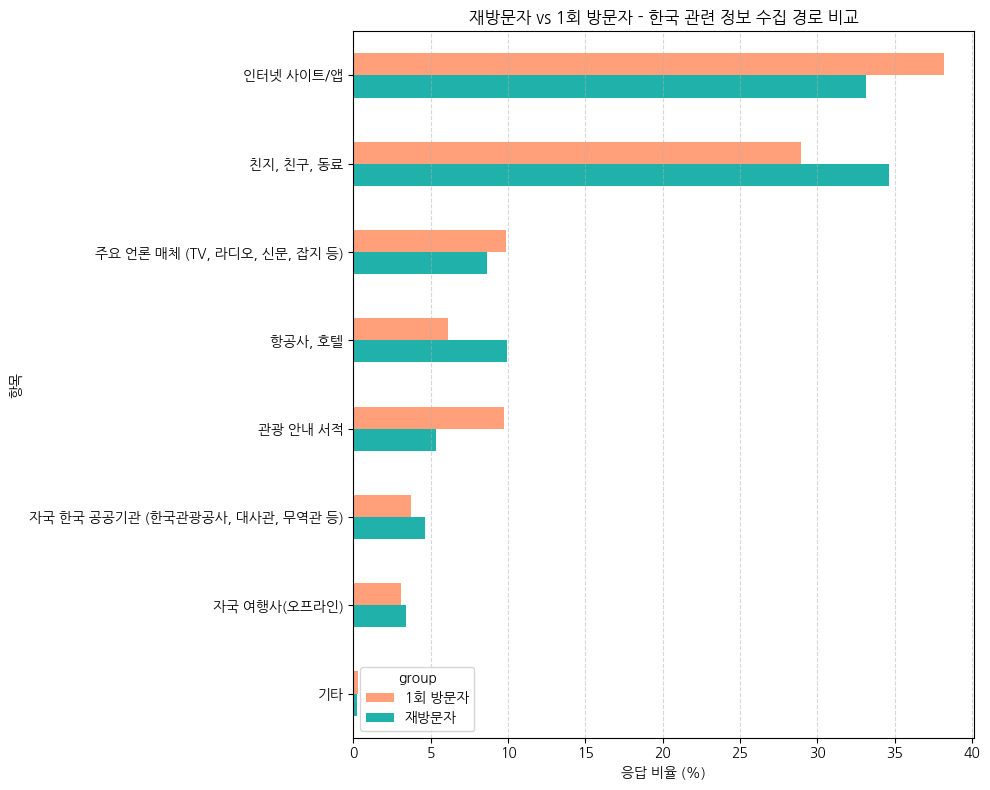

In [ ]:
# 1. 관련 변수
q4a_cols = ['Q4a1', 'Q4a2', 'Q4a3']

# 2. 두 그룹 결합
df_once_q4a = df_once[q4a_cols + ['weight']].copy()
df_once_q4a['group'] = '1회 방문자'

df_repeat_q4a = df_repeat[q4a_cols + ['weight']].copy()
df_repeat_q4a['group'] = '재방문자'

df_q4a_all = pd.concat([df_once_q4a, df_repeat_q4a], ignore_index=True)

# 3. 항목별로 펼치기
melted_q4a = df_q4a_all.melt(id_vars=['weight', 'group'], value_vars=q4a_cols,
                             value_name='항목').dropna(subset=['항목'])

# 4. 그룹별 전체 가중치
group_total_weight_q4a = melted_q4a.groupby('group')['weight'].sum().to_dict()

# 5. 응답 항목별 그룹별 가중 응답 비율 계산
summary_q4a = (
    melted_q4a.groupby(['group', '항목'])['weight'].sum()
    .reset_index()
)
summary_q4a['비율'] = summary_q4a.apply(
    lambda row: row['weight'] / group_total_weight_q4a[row['group']] * 100, axis=1
)

# 6. 피벗 정리
pivot_q4a = summary_q4a.pivot(index='항목', columns='group', values='비율').fillna(0)
pivot_q4a = pivot_q4a.loc[pivot_q4a.sum(axis=1).sort_values(ascending=False).index]

# 7. 시각화
pivot_q4a.plot(kind='barh', figsize=(10, 8), color=['#FFA07A', '#20B2AA'])
plt.xlabel('응답 비율 (%)')
plt.title('재방문자 vs 1회 방문자 - 한국 관련 정보 수집 경로 비교')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## 고려 인프라

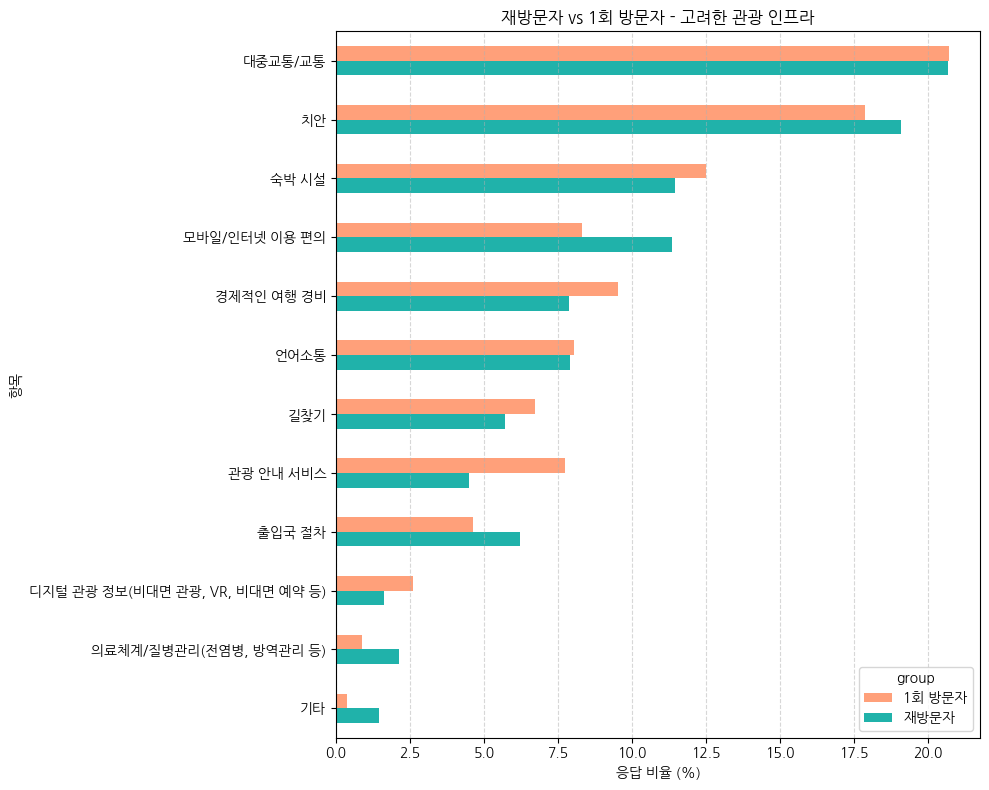

In [ ]:
q3_cols = ['Q3_2a1', 'Q3_2a2', 'Q3_2a3']

df_once_q3 = df_once[q3_cols + ['weight']].copy()
df_once_q3['group'] = '1회 방문자'
df_repeat_q3 = df_repeat[q3_cols + ['weight']].copy()
df_repeat_q3['group'] = '재방문자'

df_q3_all = pd.concat([df_once_q3, df_repeat_q3], ignore_index=True)
melted_q3 = df_q3_all.melt(id_vars=['weight', 'group'], value_vars=q3_cols, value_name='항목').dropna()

group_total_weight_q3 = melted_q3.groupby('group')['weight'].sum().to_dict()
summary_q3 = melted_q3.groupby(['group', '항목'])['weight'].sum().reset_index()
summary_q3['비율'] = summary_q3.apply(lambda row: row['weight'] / group_total_weight_q3[row['group']] * 100, axis=1)

pivot_q3 = summary_q3.pivot(index='항목', columns='group', values='비율').fillna(0)
pivot_q3 = pivot_q3.loc[pivot_q3.sum(axis=1).sort_values(ascending=False).index]

pivot_q3.plot(kind='barh', figsize=(10, 8), color=['#FFA07A', '#20B2AA'])
plt.xlabel('응답 비율 (%)')
plt.title('재방문자 vs 1회 방문자 - 고려한 관광 인프라')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 클러스터1 vs 전체 평균 비교

In [ ]:
def weighted_mean(df, col):
    mask = df[col].notna()
    return np.average(df.loc[mask, col], weights=df.loc[mask, "weight"])

def weighted_ratio(df, col, values):
    mask = df[col].isin(values)
    return df.loc[mask, "weight"].sum() / df["weight"].sum()

# 전체 데이터 (df_2024_clustered 기준)
stay_all = weighted_mean(df_2024_clustered, "M일HAP")
spend_all = weighted_mean(df_2024_clustered, "총액1인TOT2")

# 클러스터 1
stay_c1 = weighted_mean(df_cluster1_2024, "M일HAP")
spend_c1 = weighted_mean(df_cluster1_2024, "총액1인TOT2")

# 비교 출력
{
    "평균 체류일수 (일)": f"{stay_c1:.2f} vs {stay_all:.2f} ({stay_c1 / stay_all:.2f}배)",
    "1인 지출액 ($)": f"{spend_c1:.1f} vs {spend_all:.1f} ({spend_c1 / spend_all:.2f}배)",
}


{'평균 체류일수 (일)': '11.62 vs 8.29 (1.40배)',
 '1인 지출액 ($)': '3050.6 vs 1877.4 (1.62배)'}

In [ ]:
def weighted_ratio_contains(df, col, keyword):
    mask = df[col].astype(str).str.contains(keyword, na=False)
    return df.loc[mask, "weight"].sum() / df["weight"].sum()

# 개별여행, 여가 목적, 재방문 의향(긍정)
trip_ratio = weighted_ratio_contains(df_cluster1_2024, "TYP", "개별여행")
leisure_ratio = weighted_ratio_contains(df_cluster1_2024, "Q1", "여가")
revisit_ratio = weighted_ratio_contains(df_cluster1_2024, "Q13", "⑤|④")

# 전체 기준도 동일하게 적용
trip_ratio_all = weighted_ratio_contains(df_2024_clustered, "TYP", "개별여행")
leisure_ratio_all = weighted_ratio_contains(df_2024_clustered, "Q1", "여가")
revisit_ratio_all = weighted_ratio_contains(df_2024_clustered, "Q13", "⑤|④")

# 출력
{
    "개별여행 비중 (%)": f"{trip_ratio*100:.1f}% vs {trip_ratio_all*100:.1f}%",
    "여가 목적 비중 (%)": f"{leisure_ratio*100:.1f}% vs {leisure_ratio_all*100:.1f}%",
    "재방문 의향 (4~5점)": f"{revisit_ratio*100:.1f}% vs {revisit_ratio_all*100:.1f}%"
}

{'개별여행 비중 (%)': '96.7% vs 80.5%',
 '여가 목적 비중 (%)': '52.7% vs 68.0%',
 '재방문 의향 (4~5점)': '88.4% vs 92.3%'}